# <center>Fire Resistance Dataset Exploratory Data Analysis</center>


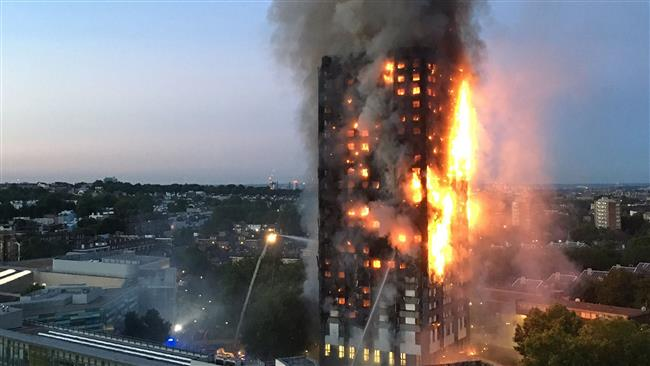

**Figure**. The tragic fire incident at the 24-story Grenfell Tower in London, occurring in June 2017, resulted in over 70 fatalities and 79 injuries.

## 1. Introduction <a id="introduction"></a>

Concrete structures undergo *retrofitting* due to deteriorations and damages incurred through their service life. The need for structural strengthening arises from the degradation of concrete and steel due to aging, changes in occupancy requiring higher load-carrying capacity of members, compliance due to code update requirements, structural damages sustained from earthquakes, and even construction mistakes that may occur at the early stage of building development. A wide range of strengthening techniques have been adopted to address these deficiencies such as concrete jacketing of beams, external steel plate bonding, and application of **Fiber-Reinforced Polymers (FRP)**.  

Among these, FRP has been gaining wide acceptance due to its significant advantages such as short installation resulting in minimizing disruption of building operations, lightweight material needing less labor and equipment, high durability to corrosion, and versatility that can be easily adaptable to any architectural orientations. However, one of the major disadvantages of FRP is its poor performance when subjected to *elevated temperatures* as its continued capability to sustain design loads can easily diminish at rapidly increasing temperatures. Moreover, adhesion failure between concrete members and FRP is likely due to its exposure to the external environment unless insulation devices are rendered to protect it. 

**Fire resistance assessment** of FRP-strengthened concrete beams involves prescriptive code approaches, experimental testing, and numerical analysis. Despite ACI recommending disregarding FRP contribution in fire resistance calculations, experimental studies have shown enhanced capacities with proper insulation. However, conducting full-scale fire tests is prohibitively expensive and impractical for routine design situations. As an alternative, numerical analysis using software like ABAQUS and ANSYS can simulate fire performance, but it requires specialized training and significant computing resources. Thus, while these methods offer potential solutions, practical challenges remain in their widespread implementation within design offices, limiting their applicability in real-world scenarios. Therefore, a balance between cost, practicality, and accuracy is crucial in selecting the most suitable approach for fire resistance evaluation.

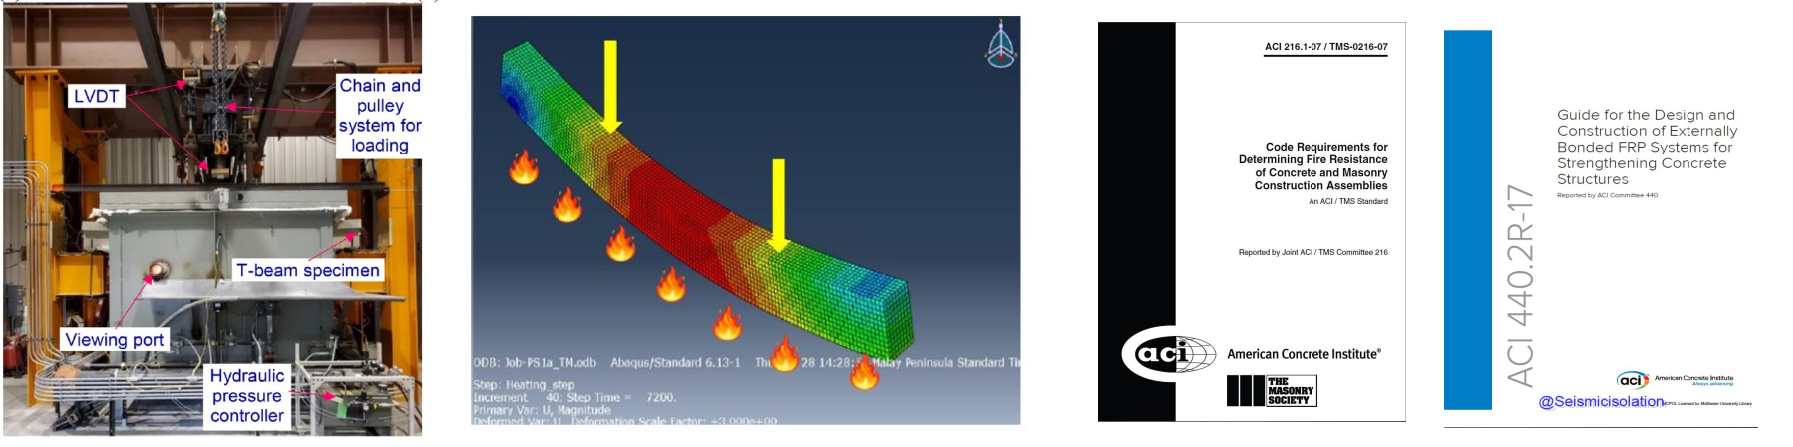

**Figure**. Approaches for evaluating fire resistance: Experimental testing, Numerical Modeling, Prescriptive Approaches (*from left to right*)

### 1.1 Business Questions <a id="business_questions"></a>

The oversimplification and infeasibility of existing methodologies in determining the fire performance of FRP-strengthened concrete beams call for a more pragmatic approach such as the use of machine learning (ML) algorithms and artificial intelligence (AI). The use of ML techniques in FRP-strengthened members has gained significant traction over the past four years with the objectives of developing modern fire assessment tools, supplementing knowledge-based approaches, and leveraging computational power to solve multi-dimensional problems in FES.

Prior to machine learning model development, exploratory data analysis (EDA) is conducted on the dataset to enhance our comprehension of feature distribution and relationships. This analysis aids in identifying factors that significantly contribute to predictive capabilities across different models and enables the detection of inconsistencies that may emerge during model development and feature importance studies. Consequently, EDA endeavors to address the following questions regarding the dataset:

* What is the overall distribution of the features, and which values occur most frequently for each?
* Which parameter/s has the most impact on the fire resistance rating of strengthened flexural members?


### 1.2 Data Source <a id="data_source"></a>

The dataset was [published](https://www.sciencedirect.com/science/article/pii/S2352340924000052) last December 2023 containing 21,384 experimental and numerical data of FRP-strengthened concrete beams. The data contains 20 parameters including geometrical, material property, loading, and fire resistance. The parameters for the numerical data were adjusted to incorporate values that align with field implementation, following consultations with construction personnel. A subset of the data was used in a prior [study](https://d.lib.msu.edu/etd/50128), but the complete dataset has not been employed in subsequent machine learning applications.

---

## 2. Table of Contents <a id="table_of_contents"></a>

[1. Introduction](#introduction)
* [1.1 Business Questions](#business_questions)
* [1.2 Data Source](#data_source)

[2. Table of Contents](#table_of_contents)

[3. Declarations](#declarations)
* [3.1 Libraries](#libraries)
* [3.2 Function Definition](#function_definition)

[4. Data Collection](#data_collection)

[5. Data Wrangling](#data_wrangling)
* [5.1 Features](#features)
* [5.2 Data Cleaning](#data_cleaning)
* [5.3 Data Export](#data_export)

[6. Univariate Analysis](#univariate_analysis)
* [6.1 Length of Beam](#length)
* [6.2 Concrete Area](#conc_area)
* [6.3 Concrete Cover](#conc_cover)
* [6.4 Steel Area](#steel)
* [6.5 FRP Area](#frp)
* [6.6 Insulation Thickness](#insulation_thickness)
* [6.7 Insulation Depth](#insulation_depth)
* [6.8 Concrete Strength](#conc_strength)
* [6.9 Steel Strength](#steel_strength)
* [6.10 FRP Strength](#frp_strength)
* [6.11 Glass Transition](#glass_transition)
* [6.12 Thermal Conductivity](#thermal_conductivity)
* [6.13 Specific Heat](#specific_heat)
* [6.14 Total Load](#total_load)
* [6.15 Load Ratio](#load_ratio)
* [6.16 Fire Resistance](#fire_resistance)

[7. Bivariate Analysis](#bivariate_analysis)
* [7.1 Length of Beam vs Fire Resistance](#length_vs_fire)
* [7.2 Concrete Area vs Fire Resistance](#conc_area_vs_fire)
* [7.3 Concrete Cover vs Fire Resistance](#conc_cover_vs_fire)
* [7.4 Steel Area vs Fire Resistance](#steel_vs_fire)
* [7.5 FRP Area vs Fire Resistance](#frp_vs_fire)
* [7.6 Insulation Thickness vs Fire Resistance](#insulation_thickness_vs_fire)
* [7.7 Insulation Depth vs Fire Resistance](#insulation_depth_vs_fire)
* [7.8 Concrete Strength vs Fire Resistance](#conc_strength_vs_fire)
* [7.9 Steel Strength vs Fire Resistance](#steel_strength_vs_fire)
* [7.10 FRP Strength vs Fire Resistance](#frp_strength_vs_fire)
* [7.11 Glass Transition vs Fire Resistance](#glass_transition_vs_fire)
* [7.12 Thermal Conductivity vs Fire Resistance](#thermal_conductivity_vs_fire)
* [7.13 Specific Heat vs Fire Resistance](#specific_heat_vs_fire)
* [7.14 Total Load vs Fire Resistance](#total_load_vs_fire)
* [7.15 Load Ratio vs Fire Resistance](#load_ratio_vs_fire)


[8. Multivariate Analysis](#multivariate_analysis)
* [8.1 Insulation Depth, Load Ratio vs Fire Resistance](#insulation_depth_vs_load_ratio_vs_fire)
* [8.2 Insulation Thickness, Load Ratio vs Fire Resistance](#insulation_thickness_vs_load_ratio_vs_fire)
* [8.3 Steel Area, Load Ratio vs Fire Resistance](#steel_vs_load_ratio_vs_fire)
* [8.4 Concrete Cover, Load Ratio vs Fire Resistance](#conc_cover_vs_load_ratio_vs_fire)


[9. Conclusion](#conclusion)

---

## 3. Declarations <a id="declarations"></a>

### 3.1 Libraries <a id="libraries"></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.max_columns', None)

### 3.2 Function Definition <a id="function_definition"></a>

In [2]:
#get no of nunique, cardinality, % of NaNs and Uknowns
def analyse_features(df, cat_cols):
    """Explores the various features of the dataframe in terms of data type, values, and cardinality.
    
    Parameters:
        df {dataframe} -- the dataframe where feature analysis will be conducted. 
        cat_cols {dataframe columns} -- columns of the dataframe that will be included in the feature analysis.
    
    Returns:
        {dataframe} -- returns the data type, unique values, cardinality, minimum value, \
        maximum value, and null values for each feature.
    """
    
    feature_details = []

    for column in cat_cols:
        
        feature_details.append({
            "Feature":column,
            "Data Type":df[column].dtype,
            "Uniques":df[column].unique(),
            "Cardinality":df[column].nunique(),
            "Minimum": df[column].min() if df[column].dtype != "object" else "-",
            "Maximum":df[column].max() if df[column].dtype != "object" else "-",
            "Nans":df[column].isnull().sum(),
            "% Share of Nans":round((df[column].isnull().sum()/len(df))*100,2)
        })

    return pd.DataFrame(feature_details)

## 4. Data Collection <a id="data_collection"></a>

In [4]:
df = pd.read_excel('../data/fire_resistance_data.xlsx')

## 5. Data Wrangling <a id="data_wrangling"></a>

### 5.1 Features <a id="features"></a>

In [4]:
df.head()

beam_name  length  concrete_area  concrete_cover  steel_area  frp_area  \
0        B1     3.0          60000              25       402.1       0.0   
1        B2     3.0          60000              25       402.1       0.0   
2        B3     3.0          60000              25       402.1     120.0   
3        B4     3.0          60000              25       402.1     120.0   
4        B5     3.0          60000              25       402.1     120.0   

   insulation_thickness  insulation_depth  conc_strength  steel_strength  \
0                   0.0               0.0           47.6             591   
1                   0.0               0.0           45.5             591   
2                  25.0               0.0           44.4             591   
3                  40.0              80.0           47.4             591   
4                  25.0              80.0           45.1             591   

   frp_strength  glass_transition  thermal_conductivity  specific_heat  \
0             0                 0                 0.000            0.0   
1             0                 0                 0.000            0.0   
2          2800                52                 0.175       730800.0   
3          2800                52                 0.175       730800.0   
4          2800                52                 0.175       730800.0   

   total_load  load_ratio  fire_resistance  
0        61.2        44.8               90  
1        61.2        44.8               90  
2        81.2        38.4               76  
3        81.2        38.4               90  
4        81.2        38.4               92

In [5]:
df.shape

(21434, 17)

In [6]:
analyse_features(df, df.columns)

Feature Data Type  \
0              beam_name    object   
1                 length   float64   
2          concrete_area     int64   
3         concrete_cover     int64   
4             steel_area   float64   
5               frp_area   float64   
6   insulation_thickness   float64   
7       insulation_depth   float64   
8          conc_strength   float64   
9         steel_strength     int64   
10          frp_strength     int64   
11      glass_transition     int64   
12  thermal_conductivity   float64   
13         specific_heat   float64   
14            total_load   float64   
15            load_ratio   float64   
16       fire_resistance     int64   

                                              Uniques  Cardinality Minimum  \
0   [B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11,...        21433       -   
1   [3.0, 6.0, 3.7, 1.5, 1.26, 4.7, 5.2, 4.4, 3.66...          224    1.26   
2   [60000, 100000, 103124, 12000, 90000, 45000, 6...           25   12000   
3                        [25, 20, 38, 10, 15, 19, 12]            7      10   
4   [402.1, 850.6, 56.55, 402.0, 942.5, 760.3, 157...           19   56.55   
5   [0.0, 120.0, 66.8, 460.0, 60.0, 28.0, 33.4, 41...          229     0.0   
6   [0.0, 25.0, 40.0, 50.0, 20.0, 1.5, 10.0, 35.0,...           20   -2.03   
7   [0.0, 80.0, 500.0, 100.0, 450.0, 200.0, 300.0,...           26     0.0   
8   [47.6, 45.5, 44.4, 47.4, 45.1, 46.0, 44.3, 23....           29    23.0   
9   [591, 375, 450, 542, 546, 372, 364, 500, 440, ...           54     364   
10  [0, 2800, 4030, 986, 2742, 2076, 3455, 1172, 1...           17       0   
11  [0, 52, 73, 82, 55, 47, 85, 75, 80, 74, 87, 76...           21       0   
12  [0.0, 0.175, 0.125, 0.06, 0.116, 0.058, 0.164,...          160     0.0   
13  [0.0, 730800.0, 735000.0, 193550.0, 245700.0, ...          198     0.0   
14  [61.2, 81.2, 121.0, 100.0, 140.0, 10.2, 16.3, ...         3563    3.82   
15  [44.8, 38.4, 52.2, 55.0, 50.0, 58.0, 47.0, 38....         2297     0.3   
16  [90, 76, 92, 91, 84, 180, 69, 60, 89, 208, 181...           86       5   

      Maximum  Nans  % Share of Nans  
0           -     0              0.0  
1      6200.0     0              0.0  
2      157500     0              0.0  
3          38     0              0.0  
4       942.5     0              0.0  
5       629.3     0              0.0  
6        50.0     0              0.0  
7       500.0     0              0.0  
8        52.0     0              0.0  
9         591     0              0.0  
10       4840     0              0.0  
11         88     0              0.0  
12       0.67     0              0.0  
13  1320000.0     0              0.0  
14     220.03     0              0.0  
15      73.49     0              0.0  
16        300     0              0.0

#### Description of features

Geometrical Parameters
* `beam_name` - unique identifier of each row in the dataset.
* `length` - distance between the supports of the beam.
* `concrete_area` - cross sectional area of the beam.
* `concrete_cover` - distance from the soffit of the beam to the nearest reinforcement bar.
* `steel_area` - amount of reinforcing bars provided within a concrete area.
* `frp_area` - amount of frp provided within the beam cross sectional area.
* `insulation_thickness` - thickness of the insulation provided at the soffit of beam.
* `insulation_depth` - extension of the insulation at the sides of the beam.

Material Property Parameters
* `conc_strength` - grade of concrete used for the beam.
* `steel_strength` - grade of steel used for the beam.
* `frp_strength` - grade of FRP used for the beam.
* `glass_transition` - transition by which polymers undergo transition from glassy to rubbery state.
* `thermal_conductivity` - ability of insulator to conduct heat from one side to the other.
* `specific_heat` - amount of heat needed to raise the temperature of 1unit of mass of insulation material by 1 unit in temperature.

Loading Parameter
* `load_ratio` - ratio of the load demand over the capacity of the beam.
* `total_load` - applied loading of the beam.

Fire Resistance
* `fire_resistance` - duration of time for which a member can sustain the applied loading under fire exposure.

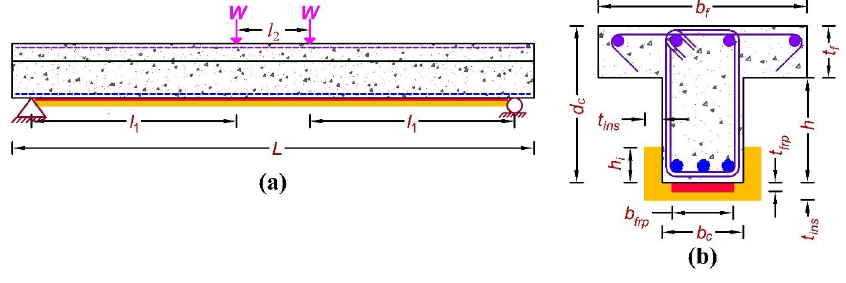


#### Findings

1. Beam length has different units in experimental vs numerical.
    * minimum length is 1.26 meters while maximum is 6200 millimeters.
    * convert all to millimeters.
2. Duplicate beam name in the dataset.
    * cardinality of beam name is 21433 while the total number of rows is 21434.
    * provide a different beam name to the duplicate.
3. Negative thickness of insulation.
    * minimum insulation thickness is -2.03.
    * convert all negative thicknesses to 0.
4. `load ratio` minimum values not consistent with dataset paper.
    * minimum load ratio is 0.3 while the paper state that the minimum load ratio is 15%. 
    * convert decimal load ratios to percentage.

### 5.2 Data Cleaning <a id="data_cleaning"></a>

Multiply beam length by 1000 for experimental data:

In [7]:
df.loc[df[df['beam_name'].str[0] == 'B']['length'].index, 'length'] *= 1000

In [8]:
df.head()

beam_name  length  concrete_area  concrete_cover  steel_area  frp_area  \
0        B1  3000.0          60000              25       402.1       0.0   
1        B2  3000.0          60000              25       402.1       0.0   
2        B3  3000.0          60000              25       402.1     120.0   
3        B4  3000.0          60000              25       402.1     120.0   
4        B5  3000.0          60000              25       402.1     120.0   

   insulation_thickness  insulation_depth  conc_strength  steel_strength  \
0                   0.0               0.0           47.6             591   
1                   0.0               0.0           45.5             591   
2                  25.0               0.0           44.4             591   
3                  40.0              80.0           47.4             591   
4                  25.0              80.0           45.1             591   

   frp_strength  glass_transition  thermal_conductivity  specific_heat  \
0             0                 0                 0.000            0.0   
1             0                 0                 0.000            0.0   
2          2800                52                 0.175       730800.0   
3          2800                52                 0.175       730800.0   
4          2800                52                 0.175       730800.0   

   total_load  load_ratio  fire_resistance  
0        61.2        44.8               90  
1        61.2        44.8               90  
2        81.2        38.4               76  
3        81.2        38.4               90  
4        81.2        38.4               92

In [9]:
df['length'] = df['length'].astype('int64')

Duplicate beam name:

In [10]:
df[df['beam_name'].duplicated(keep=False)]

beam_name  length  concrete_area  concrete_cover  steel_area  frp_area  \
44       B45    3660          60800              19       339.3      76.5   
45       B45    3660         125730              38       603.2     173.4   

    insulation_thickness  insulation_depth  conc_strength  steel_strength  \
44                  25.0             152.0           48.0             500   
45                   0.0               0.0           42.0             440   

    frp_strength  glass_transition  thermal_conductivity  specific_heat  \
44          1172                80                 0.156       510000.0   
45          1034                82                 0.000       510000.0   

    total_load  load_ratio  fire_resistance  
44        26.0        66.0              180  
45        98.0        51.0              180

In [11]:
df.iloc[42:52]

beam_name  length  concrete_area  concrete_cover  steel_area  frp_area  \
42       B43    3000          45000              19      157.10      60.0   
43       B44    3660          60800              19      339.30      76.5   
44       B45    3660          60800              19      339.30      76.5   
45       B45    3660         125730              38      603.20     173.4   
46       B46    3660         125730              38      603.20     173.4   
47       B47    3660         125730              38      603.20     173.4   
48       B48    3660         125730              38      603.20     102.0   
49       B49    3660         125730              38      898.00     102.0   
50    I1_ B1    1840          12000              10       63.31       0.0   
51    I1_ B2    1440          12000              10       63.31       0.0   

    insulation_thickness  insulation_depth  conc_strength  steel_strength  \
42                  50.0             300.0           30.1             500   
43                  19.0             152.0           48.0             500   
44                  25.0             152.0           48.0             500   
45                   0.0               0.0           42.0             440   
46                  25.0              75.0           42.0             440   
47                  19.0             112.0           42.0             440   
48                  32.0             152.0           46.0             460   
49                  19.0             152.0           46.0             450   
50                   0.0               0.0           39.0             419   
51                   0.0               0.0           39.0             451   

    frp_strength  glass_transition  thermal_conductivity  specific_heat  \
42          2742                75                 0.058       427500.0   
43          1172                80                 0.156       510000.0   
44          1172                80                 0.156       510000.0   
45          1034                82                 0.000       510000.0   
46          1034                82                 0.156       510000.0   
47          1034                82                 0.156       510000.0   
48          1172                82                 0.156       510000.0   
49          1172                82                 0.156       510000.0   
50             0                 0                 0.000            0.0   
51             0                 0                 0.000            0.0   

    total_load  load_ratio  fire_resistance  
42       48.00         0.3              128  
43       21.00        56.0              180  
44       26.00        66.0              180  
45       98.00        51.0              180  
46       98.00        51.0              180  
47      116.00        61.0              176  
48       97.00        51.0              240  
49      128.00        54.0              240  
50        3.82        46.6               45  
51        6.71        57.1               40

In [12]:
df.iloc[45, 0] = 'B50'

In [13]:
df.iloc[44:47]

beam_name  length  concrete_area  concrete_cover  steel_area  frp_area  \
44       B45    3660          60800              19       339.3      76.5   
45       B50    3660         125730              38       603.2     173.4   
46       B46    3660         125730              38       603.2     173.4   

    insulation_thickness  insulation_depth  conc_strength  steel_strength  \
44                  25.0             152.0           48.0             500   
45                   0.0               0.0           42.0             440   
46                  25.0              75.0           42.0             440   

    frp_strength  glass_transition  thermal_conductivity  specific_heat  \
44          1172                80                 0.156       510000.0   
45          1034                82                 0.000       510000.0   
46          1034                82                 0.156       510000.0   

    total_load  load_ratio  fire_resistance  
44        26.0        66.0              180  
45        98.0        51.0              180  
46        98.0        51.0              180

Change negative insulation thickness to 0.

In [14]:
df[df['insulation_thickness']<0]['insulation_thickness'].value_counts()

insulation_thickness
-0.51    165
-1.02    117
-2.03    117
-0.11     69
-0.17     69
-0.33     69
-1.00     66
-0.58     63
-0.24     57
Name: count, dtype: int64

In [15]:
df.loc[df[df['insulation_thickness']<0].index, 'insulation_thickness'] = 0

In [16]:
df[df['insulation_thickness']<0]['insulation_thickness'].value_counts()

Series([], Name: count, dtype: int64)

Changing data type of `specific_heat`:

In [17]:
df['specific_heat'] = df['specific_heat'].astype('int64')

Changing minimum value of `load_ratio`:

In [18]:
indices = list(df[df['load_ratio'] < 1].index)
df.iloc[indices, 15] *=100

In [19]:
df.iloc[indices]

beam_name  length  concrete_area  concrete_cover  steel_area  frp_area  \
31       B32    4400         100000              25       760.3      0.00   
32       B33    4400         100000              25       760.3     41.75   
33       B34    3000          45000              19       157.1      0.00   
34       B35    3000          45000              19       157.1     60.00   
35       B36    3000          45000              19       157.1     60.00   
36       B37    3000          45000              19       157.1     60.00   
37       B38    3000          45000              19       157.1     60.00   
38       B39    3000          45000              19       157.1     60.00   
39       B40    3000          45000              19       157.1     60.00   
40       B41    3000          45000              19       157.1     60.00   
41       B42    3000          45000              19       157.1     60.00   
42       B43    3000          45000              19       157.1     60.00   

    insulation_thickness  insulation_depth  conc_strength  steel_strength  \
31                   0.0               0.0           40.4             364   
32                  10.0              80.0           40.4             364   
33                   0.0               0.0           30.1             500   
34                  20.0             300.0           30.1             500   
35                  35.0             300.0           30.1             500   
36                  50.0             300.0           30.1             500   
37                  20.0             300.0           30.1             500   
38                  35.0             300.0           30.1             500   
39                  50.0             300.0           30.1             500   
40                  20.0             300.0           30.1             500   
41                  35.0             300.0           30.1             500   
42                  50.0             300.0           30.1             500   

    frp_strength  glass_transition  thermal_conductivity  specific_heat  \
31             0                 0                 0.000              0   
32          3455                85                 0.126         518000   
33             0                 0                 0.000              0   
34          2742                75                 0.130         594000   
35          2742                75                 0.130         594000   
36          2742                75                 0.130         594000   
37          2742                75                 0.670        1320000   
38          2742                75                 0.670        1320000   
39          2742                75                 0.670        1320000   
40          2742                75                 0.058         427500   
41          2742                75                 0.058         427500   
42          2742                75                 0.058         427500   

    total_load  load_ratio  fire_resistance  
31        76.0        50.0              129  
32       102.0        50.0              199  
33        48.0        50.0               77  
34        48.0        30.0              100  
35        48.0        30.0              108  
36        48.0        30.0              127  
37        48.0        30.0               92  
38        48.0        30.0              114  
39        48.0        30.0              104  
40        48.0        30.0               86  
41        48.0        30.0              128  
42        48.0        30.0              128

Reanalyse features:

In [20]:
analyse_features(df, df.columns)

Feature Data Type  \
0              beam_name    object   
1                 length     int64   
2          concrete_area     int64   
3         concrete_cover     int64   
4             steel_area   float64   
5               frp_area   float64   
6   insulation_thickness   float64   
7       insulation_depth   float64   
8          conc_strength   float64   
9         steel_strength     int64   
10          frp_strength     int64   
11      glass_transition     int64   
12  thermal_conductivity   float64   
13         specific_heat     int64   
14            total_load   float64   
15            load_ratio   float64   
16       fire_resistance     int64   

                                              Uniques  Cardinality Minimum  \
0   [B1, B2, B3, B4, B5, B6, B7, B8, B9, B10, B11,...        21434       -   
1   [3000, 6000, 3700, 1500, 1260, 4700, 5200, 440...          216    1220   
2   [60000, 100000, 103124, 12000, 90000, 45000, 6...           25   12000   
3                        [25, 20, 38, 10, 15, 19, 12]            7      10   
4   [402.1, 850.6, 56.55, 402.0, 942.5, 760.3, 157...           19   56.55   
5   [0.0, 120.0, 66.8, 460.0, 60.0, 28.0, 33.4, 41...          229     0.0   
6   [0.0, 25.0, 40.0, 50.0, 20.0, 1.5, 10.0, 35.0,...           11     0.0   
7   [0.0, 80.0, 500.0, 100.0, 450.0, 200.0, 300.0,...           26     0.0   
8   [47.6, 45.5, 44.4, 47.4, 45.1, 46.0, 44.3, 23....           29    23.0   
9   [591, 375, 450, 542, 546, 372, 364, 500, 440, ...           54     364   
10  [0, 2800, 4030, 986, 2742, 2076, 3455, 1172, 1...           17       0   
11  [0, 52, 73, 82, 55, 47, 85, 75, 80, 74, 87, 76...           21       0   
12  [0.0, 0.175, 0.125, 0.06, 0.116, 0.058, 0.164,...          160     0.0   
13  [0, 730800, 735000, 193550, 245700, 326325, 61...          198       0   
14  [61.2, 81.2, 121.0, 100.0, 140.0, 10.2, 16.3, ...         3563    3.82   
15  [44.8, 38.4, 52.2, 55.0, 50.0, 58.0, 47.0, 38....         2296   15.34   
16  [90, 76, 92, 91, 84, 180, 69, 60, 89, 208, 181...           86       5   

    Maximum  Nans  % Share of Nans  
0         -     0              0.0  
1      6200     0              0.0  
2    157500     0              0.0  
3        38     0              0.0  
4     942.5     0              0.0  
5     629.3     0              0.0  
6      50.0     0              0.0  
7     500.0     0              0.0  
8      52.0     0              0.0  
9       591     0              0.0  
10     4840     0              0.0  
11       88     0              0.0  
12     0.67     0              0.0  
13  1320000     0              0.0  
14   220.03     0              0.0  
15    73.49     0              0.0  
16      300     0              0.0

In [51]:
df.set_index('beam_name', inplace=True)

In [52]:
df.head()

length  concrete_area  concrete_cover  steel_area  frp_area  \
beam_name                                                                
B1           3000          60000              25       402.1       0.0   
B2           3000          60000              25       402.1       0.0   
B3           3000          60000              25       402.1     120.0   
B4           3000          60000              25       402.1     120.0   
B5           3000          60000              25       402.1     120.0   

           insulation_thickness  insulation_depth  conc_strength  \
beam_name                                                          
B1                          0.0               0.0           47.6   
B2                          0.0               0.0           45.5   
B3                         25.0               0.0           44.4   
B4                         40.0              80.0           47.4   
B5                         25.0              80.0           45.1   

           steel_strength  frp_strength  glass_transition  \
beam_name                                                   
B1                    591             0                 0   
B2                    591             0                 0   
B3                    591          2800                52   
B4                    591          2800                52   
B5                    591          2800                52   

           thermal_conductivity  specific_heat  total_load  load_ratio  \
beam_name                                                                
B1                        0.000              0        61.2        44.8   
B2                        0.000              0        61.2        44.8   
B3                        0.175         730800        81.2        38.4   
B4                        0.175         730800        81.2        38.4   
B5                        0.175         730800        81.2        38.4   

           fire_resistance  
beam_name                   
B1                      90  
B2                      90  
B3                      76  
B4                      90  
B5                      92

### 5.3 Data Export <a id="data_export"></a>

In [53]:
df.to_csv('data/fire_resistance.csv')

## 6. Univariate Analysis <a id="univariate_analysis"></a>

In [21]:
df.describe().T

count           mean            std       min  \
length                21434.0    3361.466828    1465.750853   1220.00   
concrete_area         21434.0   88415.447327   41630.032348  12000.00   
concrete_cover        21434.0      26.442008       9.716656     10.00   
steel_area            21434.0     400.465934     205.843968     56.55   
frp_area              21434.0     118.107906     103.091829      0.00   
insulation_thickness  21434.0      25.300247      10.481741      0.00   
insulation_depth      21434.0      41.823505      36.234822      0.00   
conc_strength         21434.0      33.493473       4.077149     23.00   
steel_strength        21434.0     436.722497      14.346190    364.00   
frp_strength          21434.0    2115.769245    1556.323174      0.00   
glass_transition      21434.0      81.255482      10.231344      0.00   
thermal_conductivity  21434.0       0.106035       0.059686      0.00   
specific_heat         21434.0  452970.142950  241696.720205      0.00   
total_load            21434.0      58.218888      31.307395      3.82   
load_ratio            21434.0      56.229947      11.481221     15.34   
fire_resistance       21434.0     101.908556      73.880479      5.00   

                             25%         50%         75%         max  
length                  2000.000    3000.000    4700.000     6200.00  
concrete_area          50000.000   90000.000  122500.000   157500.00  
concrete_cover            19.000      25.000      38.000       38.00  
steel_area               213.880     379.840     569.760      942.50  
frp_area                  39.600      91.800     162.400      629.30  
insulation_thickness      19.000      25.000      38.000       50.00  
insulation_depth           0.000      38.000      75.000      500.00  
conc_strength             30.000      33.000      37.000       52.00  
steel_strength           424.000     436.000     448.000      591.00  
frp_strength            1034.000    1100.000    4100.000     4840.00  
glass_transition          80.000      83.000      86.000       88.00  
thermal_conductivity       0.055       0.096       0.158        0.67  
specific_heat         315000.000  387000.000  590000.000  1320000.00  
total_load                38.480      52.660      73.230      220.03  
load_ratio                46.180      56.540      69.130       73.49  
fire_resistance           45.000      75.000     150.000      300.00

### 6.1 Length of Beam <a id="length"></a>

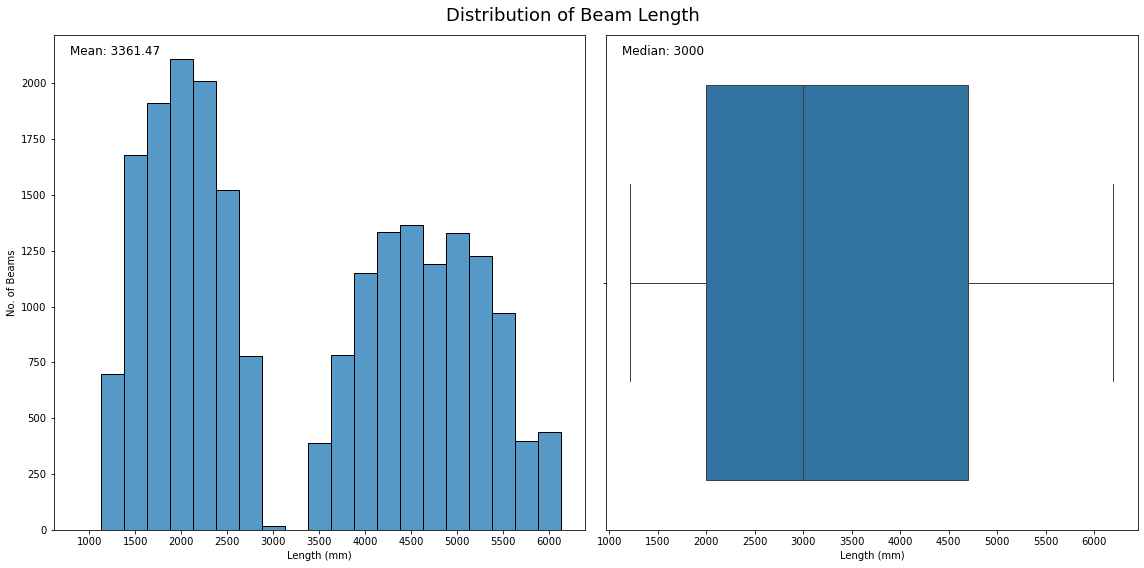

In [173]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))


sns.histplot(
    ax=axs[0],
    data=df,
    x='length',
    bins=np.arange(1000,6500, 250)-125
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='length',
)

fig.suptitle('Distribution of Beam Length', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Length (mm)')
axs[1].set_xlabel('Length (mm)')

mean = df['length'].mean()
median = df['length'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.0f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(1000,6500, 500))
axs[1].set_xticks(np.arange(1000,6500, 500))

plt.tight_layout();

### 6.2 Concrete Area <a id="conc_area"></a>

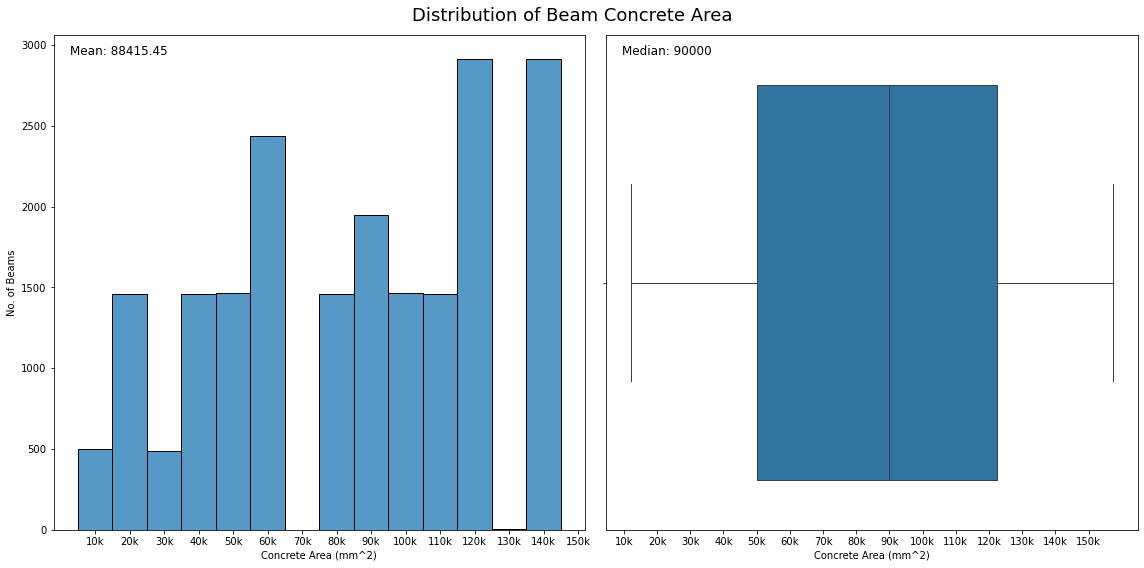

In [176]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))


sns.histplot(
    ax=axs[0],
    data=df,
    x='concrete_area',
    bins=np.arange(10000, 160000, 10000)-5000
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='concrete_area',
)

fig.suptitle('Distribution of Beam Concrete Area', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Concrete Area (mm^2)')
axs[1].set_xlabel('Concrete Area (mm^2)')

mean = df['concrete_area'].mean()
median = df['concrete_area'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.0f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(10000,160000, 10000))
axs[1].set_xticks(np.arange(10000,160000, 10000))

axs[0].set_xticklabels([f'{int(x/1000)}k' for x in axs[0].get_xticks()])
axs[1].set_xticklabels([f'{int(x/1000)}k' for x in axs[1].get_xticks()])

plt.tight_layout();

### 6.3 Concrete Cover <a id="conc_cover"></a>

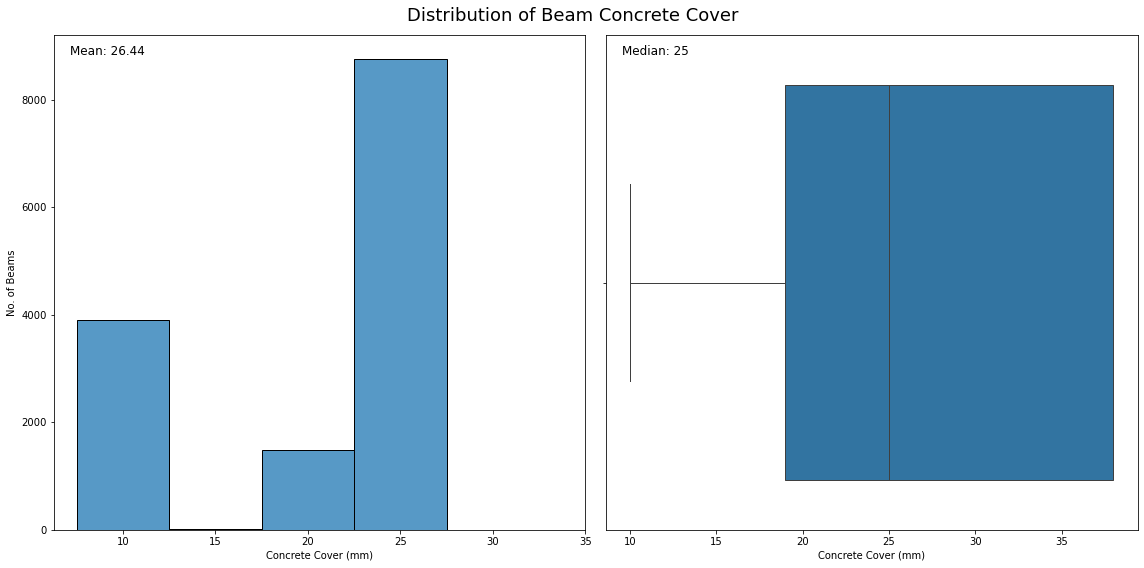

In [183]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))


sns.histplot(
    ax=axs[0],
    data=df,
    x='concrete_cover',
    bins=np.arange(10,38,5)-2.5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='concrete_cover',
)

fig.suptitle('Distribution of Beam Concrete Cover', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Concrete Cover (mm)')
axs[1].set_xlabel('Concrete Cover (mm)')

mean = df['concrete_cover'].mean()
median = df['concrete_cover'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.0f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(10,38,5))
axs[1].set_xticks(np.arange(10,38,5))

plt.tight_layout();

### 6.4 Steel Area <a id="steel"></a>

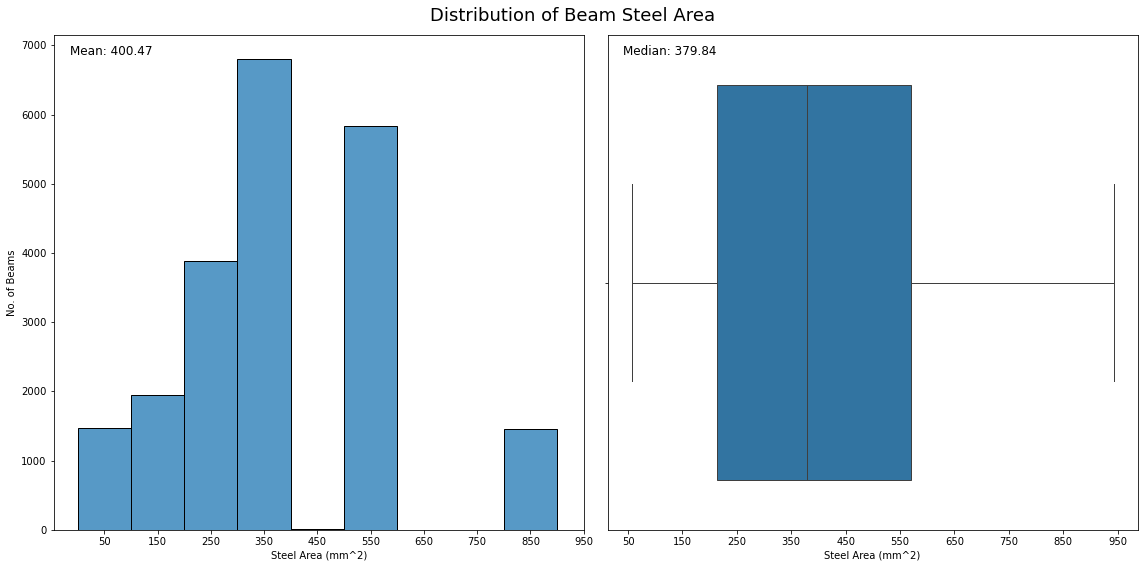

In [194]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))


sns.histplot(
    ax=axs[0],
    data=df,
    x='steel_area',
    bins=np.arange(50,1000,100)-50
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='steel_area',
)

fig.suptitle('Distribution of Beam Steel Area', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Steel Area (mm^2)')
axs[1].set_xlabel('Steel Area (mm^2)')

mean = df['steel_area'].mean()
median = df['steel_area'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(50,1000,100))
axs[1].set_xticks(np.arange(50,1000,100))

plt.tight_layout();

### 6.5 FRP Area <a id="frp"></a>

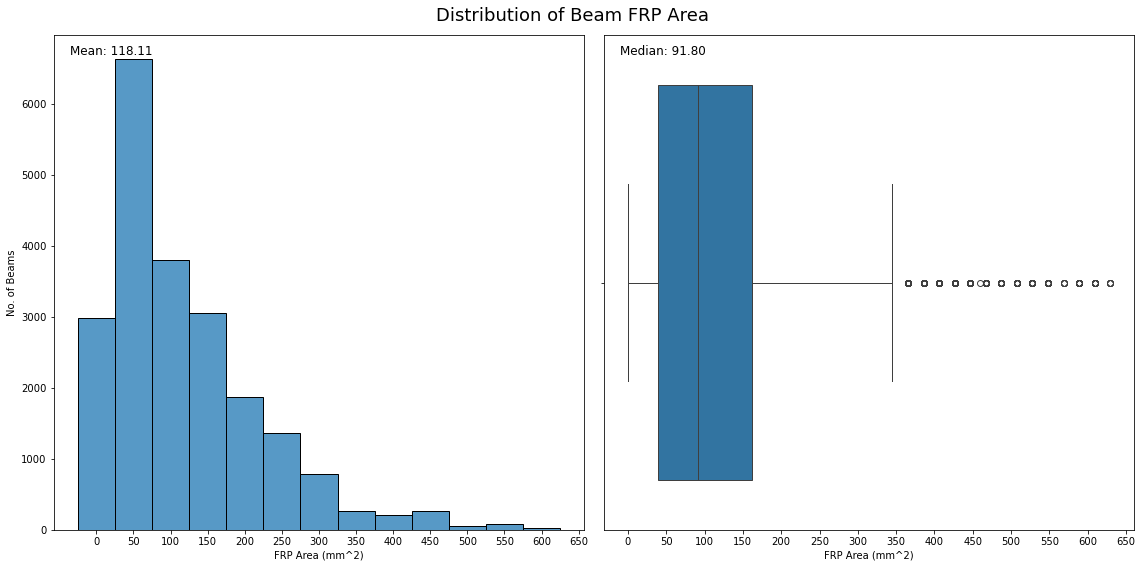

In [196]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))


sns.histplot(
    ax=axs[0],
    data=df,
    x='frp_area',
    bins=np.arange(0,700,50)-25
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='frp_area',
)

fig.suptitle('Distribution of Beam FRP Area', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('FRP Area (mm^2)')
axs[1].set_xlabel('FRP Area (mm^2)')

mean = df['frp_area'].mean()
median = df['frp_area'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,700,50))
axs[1].set_xticks(np.arange(0,700,50))

plt.tight_layout();

### 6.6 Insulation thickness <a id="insulation_thickness"></a>

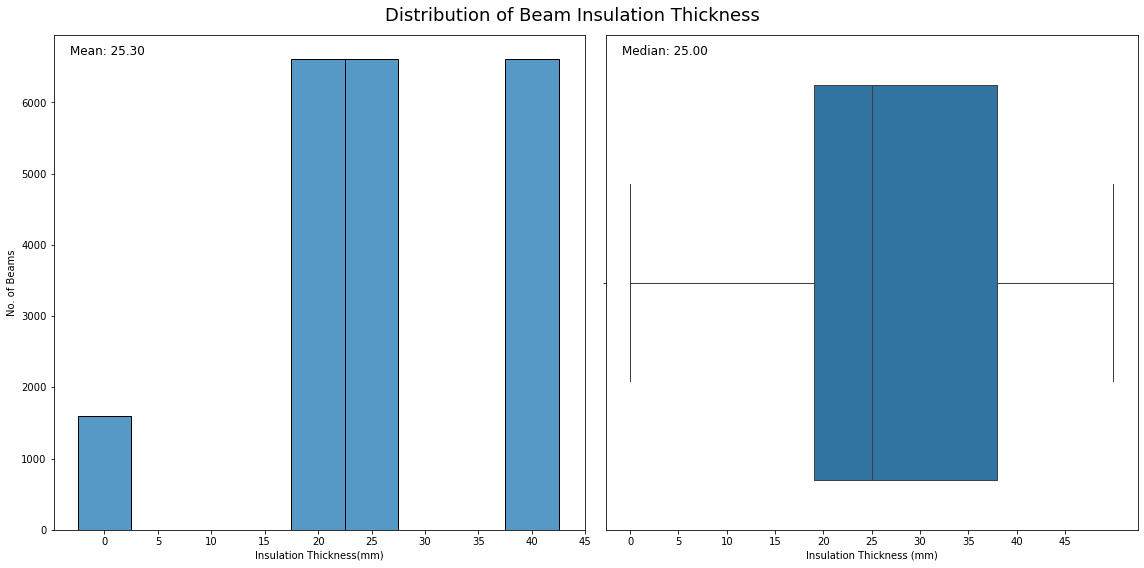

In [197]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))


sns.histplot(
    ax=axs[0],
    data=df,
    x='insulation_thickness',
    bins=np.arange(0,50,5)-2.5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='insulation_thickness',
)

fig.suptitle('Distribution of Beam Insulation Thickness', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Insulation Thickness(mm)')
axs[1].set_xlabel('Insulation Thickness (mm)')

mean = df['insulation_thickness'].mean()
median = df['insulation_thickness'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,50,5))
axs[1].set_xticks(np.arange(0,50,5))

plt.tight_layout();

### 6.7 Insulation Depth <a id="insulation_depth"></a>

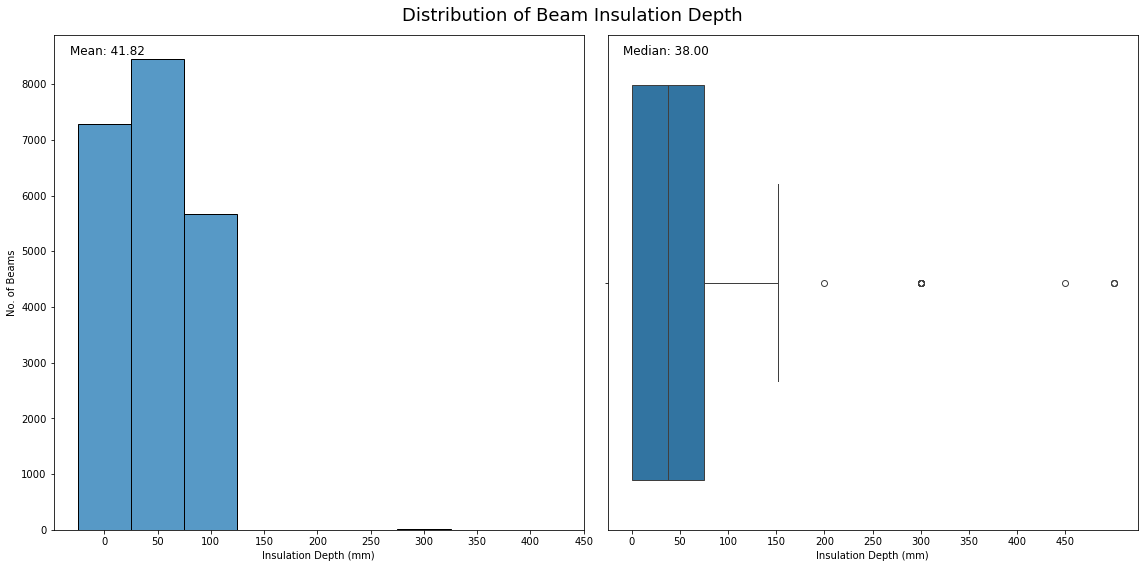

In [198]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))


sns.histplot(
    ax=axs[0],
    data=df,
    x='insulation_depth',
    bins=np.arange(0,500,50)-25
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='insulation_depth',
)

fig.suptitle('Distribution of Beam Insulation Depth', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Insulation Depth (mm)')
axs[1].set_xlabel('Insulation Depth (mm)')

mean = df['insulation_depth'].mean()
median = df['insulation_depth'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,500,50))
axs[1].set_xticks(np.arange(0,500,50))

plt.tight_layout();

### 6.8 Concrete Strength <a id="conc_strength"></a>

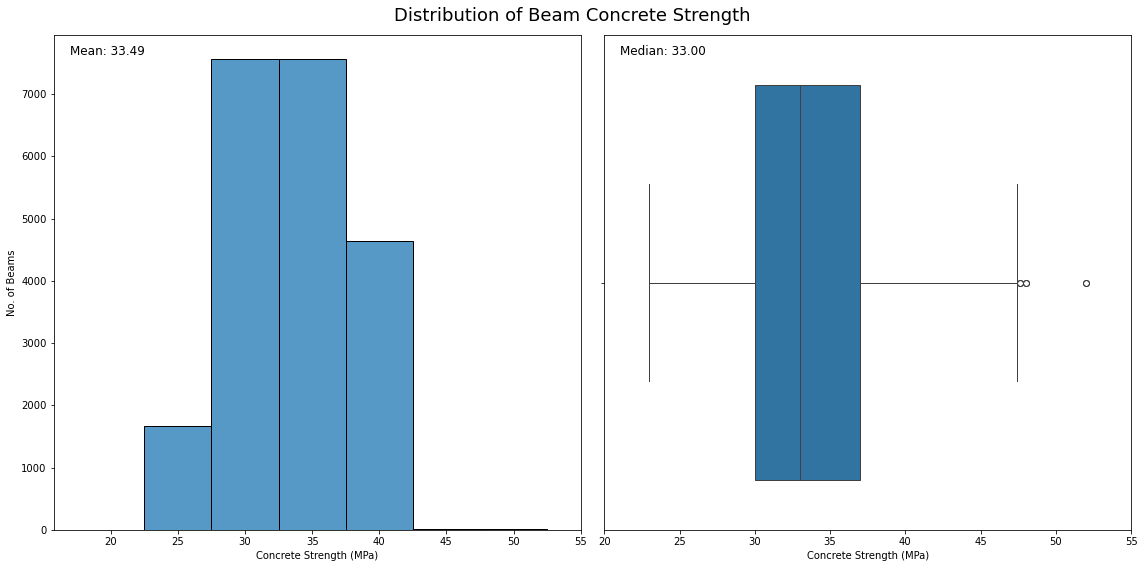

In [199]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='conc_strength',
    bins=np.arange(20,60,5)-2.5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='conc_strength',
)

fig.suptitle('Distribution of Beam Concrete Strength', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Concrete Strength (MPa)')
axs[1].set_xlabel('Concrete Strength (MPa)')

mean = df['conc_strength'].mean()
median = df['conc_strength'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(20,60,5))
axs[1].set_xticks(np.arange(20,60,5))

plt.tight_layout();

### 6.9 Steel Strength <a id="steel_strength"></a>

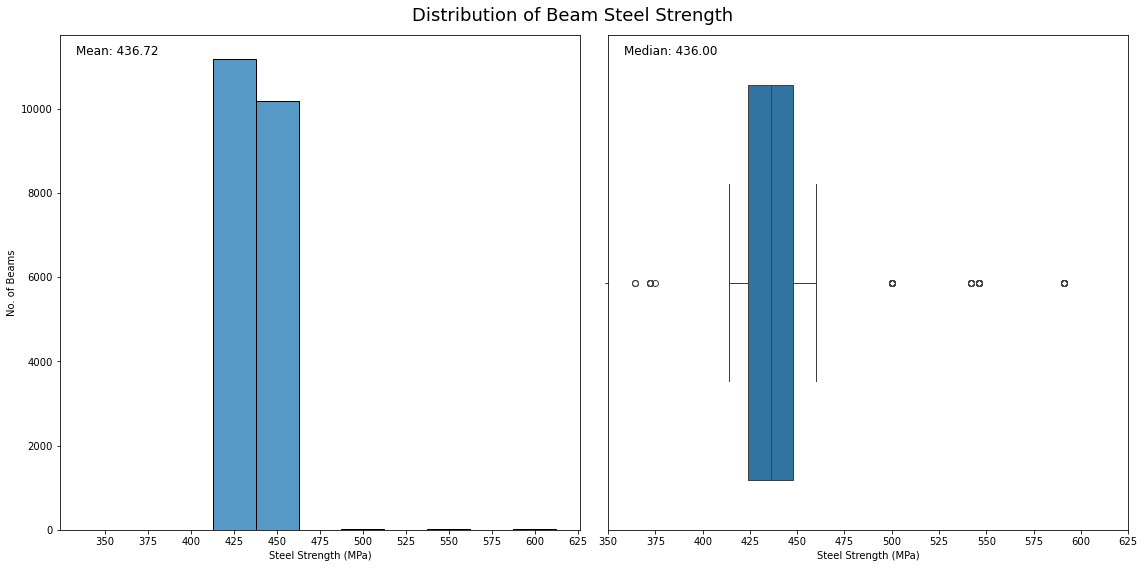

In [202]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='steel_strength',
    bins=np.arange(350,650,25)-12.5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='steel_strength',
)

fig.suptitle('Distribution of Beam Steel Strength', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Steel Strength (MPa)')
axs[1].set_xlabel('Steel Strength (MPa)')

mean = df['steel_strength'].mean()
median = df['steel_strength'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(350,650,25))
axs[1].set_xticks(np.arange(350,650,25))

plt.tight_layout();

### 6.10 FRP Strength <a id="frp_strength"></a>

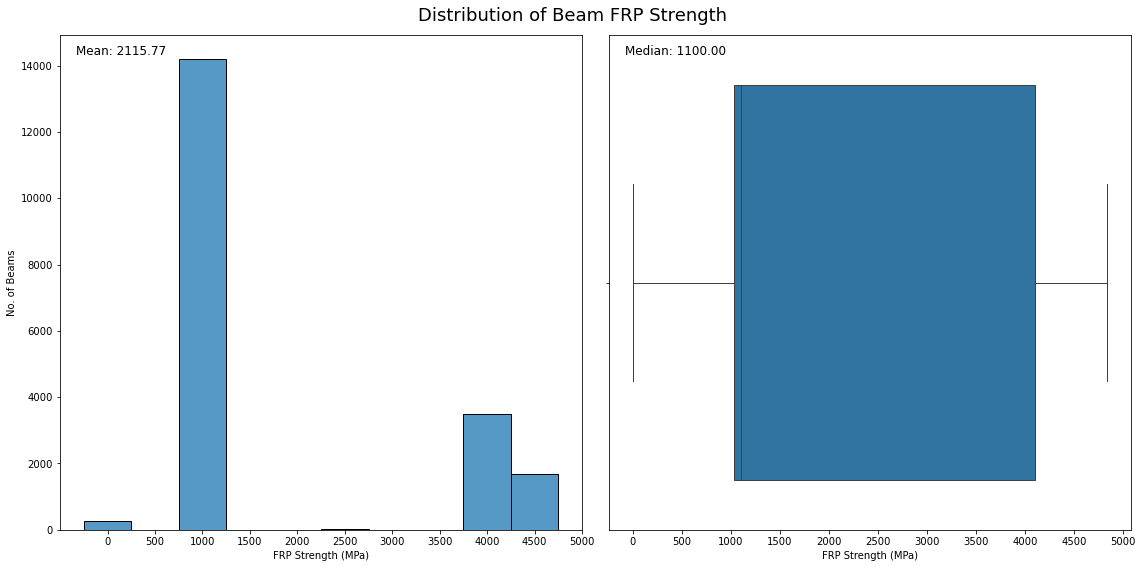

In [203]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='frp_strength',
    bins=np.arange(0,5500,500)-250
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='frp_strength',
)

fig.suptitle('Distribution of Beam FRP Strength', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('FRP Strength (MPa)')
axs[1].set_xlabel('FRP Strength (MPa)')

mean = df['frp_strength'].mean()
median = df['frp_strength'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,5500,500))
axs[1].set_xticks(np.arange(0,5500,500))

plt.tight_layout();

### 6.11 Glass Transition <a id="glass_transition"></a>

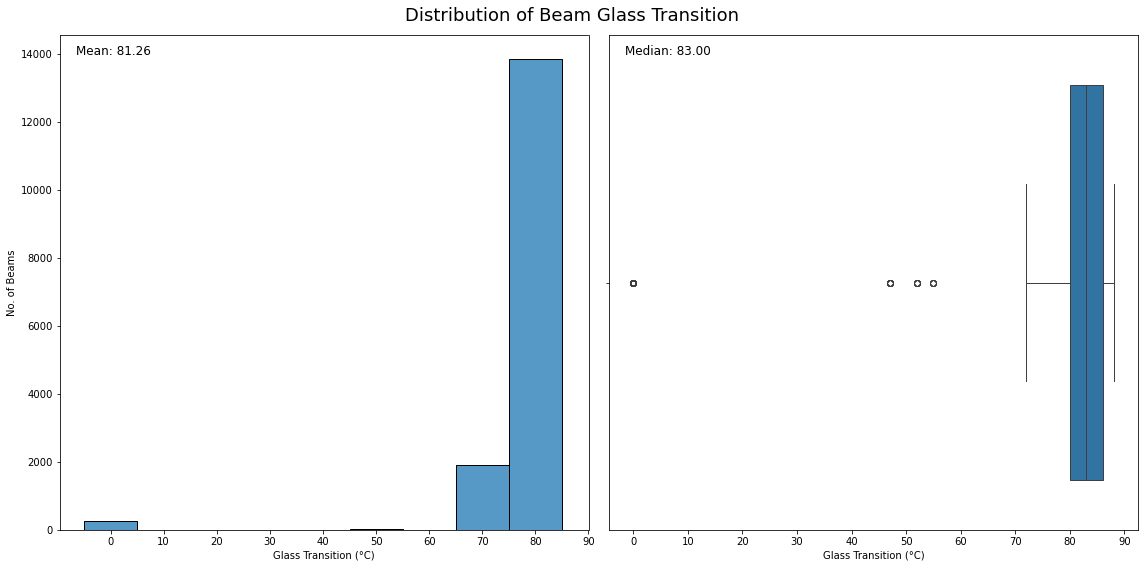

In [205]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='glass_transition',
    bins=np.arange(0,100,10)-5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='glass_transition',
)

fig.suptitle('Distribution of Beam Glass Transition', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Glass Transition (°C)')
axs[1].set_xlabel('Glass Transition (°C)')

mean = df['glass_transition'].mean()
median = df['glass_transition'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,100,10))
axs[1].set_xticks(np.arange(0,100,10))

plt.tight_layout();

### 6.12 Thermal Conductivity <a id="thermal_conductivity"></a>

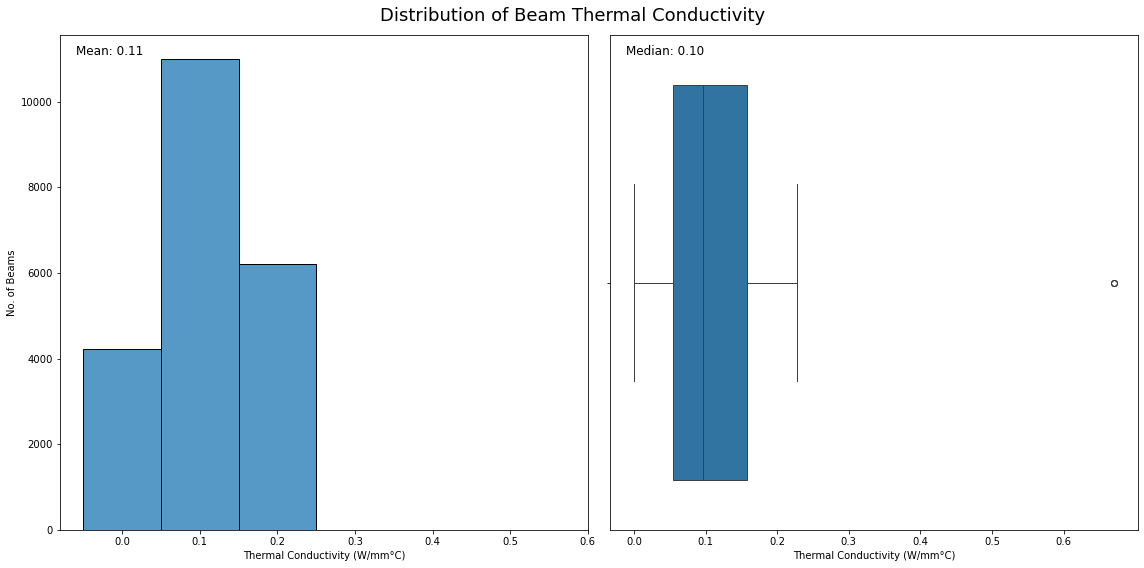

In [206]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='thermal_conductivity',
    bins=np.arange(0,0.67,0.1)-0.05
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='thermal_conductivity',
)

fig.suptitle('Distribution of Beam Thermal Conductivity', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Thermal Conductivity (W/mm°C)')
axs[1].set_xlabel('Thermal Conductivity (W/mm°C)')

mean = df['thermal_conductivity'].mean()
median = df['thermal_conductivity'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,0.67,0.1))
axs[1].set_xticks(np.arange(0,0.67,0.1))

plt.tight_layout();

### 6.13 Specific Heat <a id="specific_heat"></a>

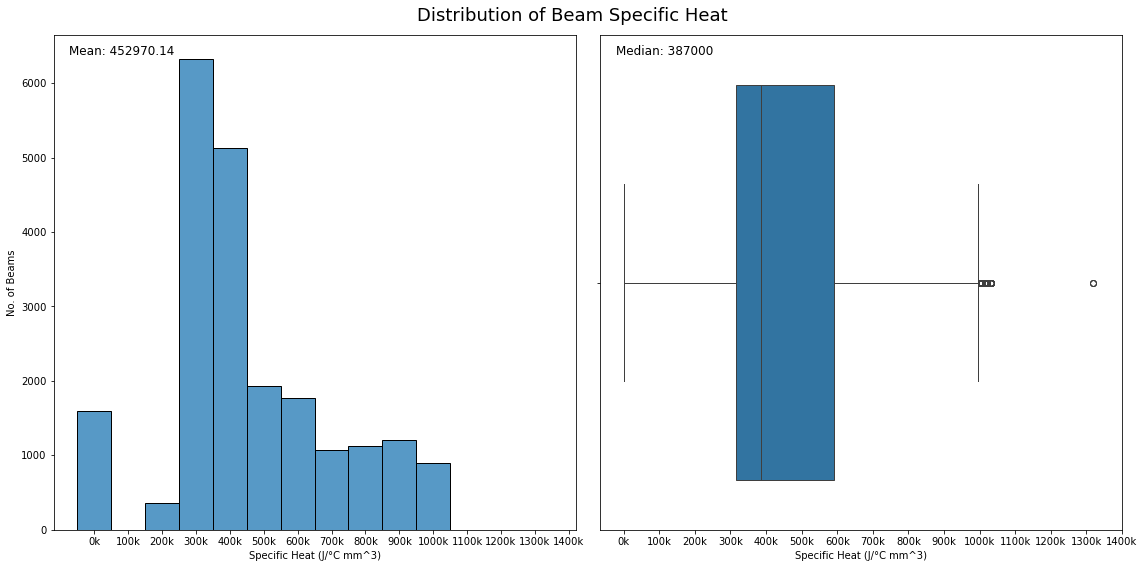

In [211]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='specific_heat',
    bins=np.arange(0,1420000,100000)-50000
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='specific_heat',
)

fig.suptitle('Distribution of Beam Specific Heat', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Specific Heat (J/°C mm^3)')
axs[1].set_xlabel('Specific Heat (J/°C mm^3)')

mean = df['specific_heat'].mean()
median = df['specific_heat'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.0f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,1420000,100000))
axs[1].set_xticks(np.arange(0,1420000,100000))

axs[0].set_xticklabels([f'{int(x/1000)}k' for x in axs[0].get_xticks()])
axs[1].set_xticklabels([f'{int(x/1000)}k' for x in axs[1].get_xticks()])

plt.tight_layout();

### 6.14 Total Load <a id="total_load"></a>

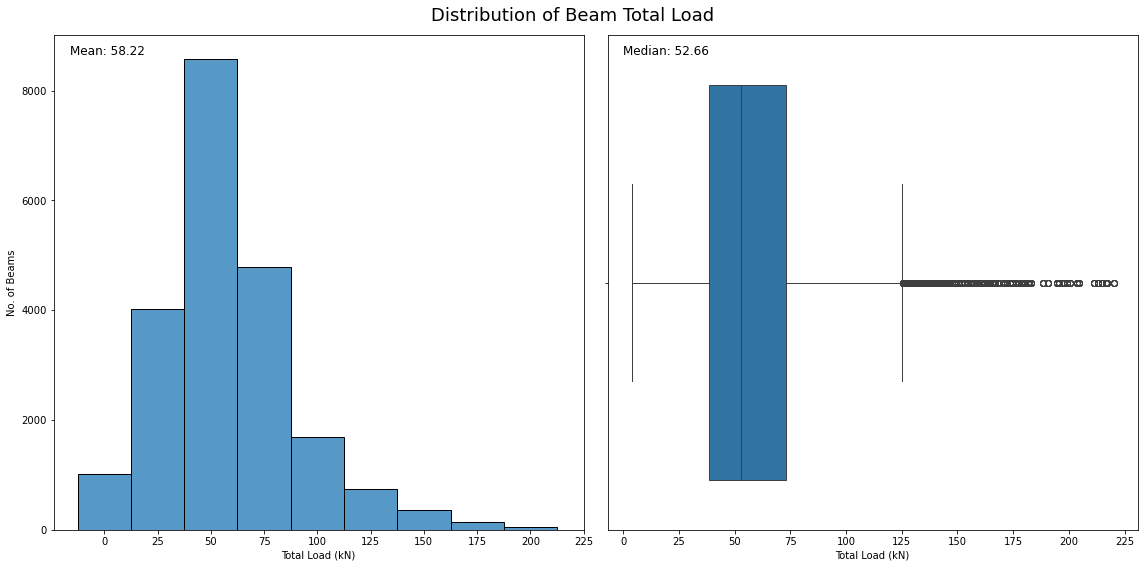

In [213]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='total_load',
    bins=np.arange(0,250,25)-12.5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='total_load',
)

fig.suptitle('Distribution of Beam Total Load', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Total Load (kN)')
axs[1].set_xlabel('Total Load (kN)')

mean = df['total_load'].mean()
median = df['total_load'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,250,25))
axs[1].set_xticks(np.arange(0,250,25))

plt.tight_layout();

### 6.15 Load Ratio <a id="load_ratio"></a>

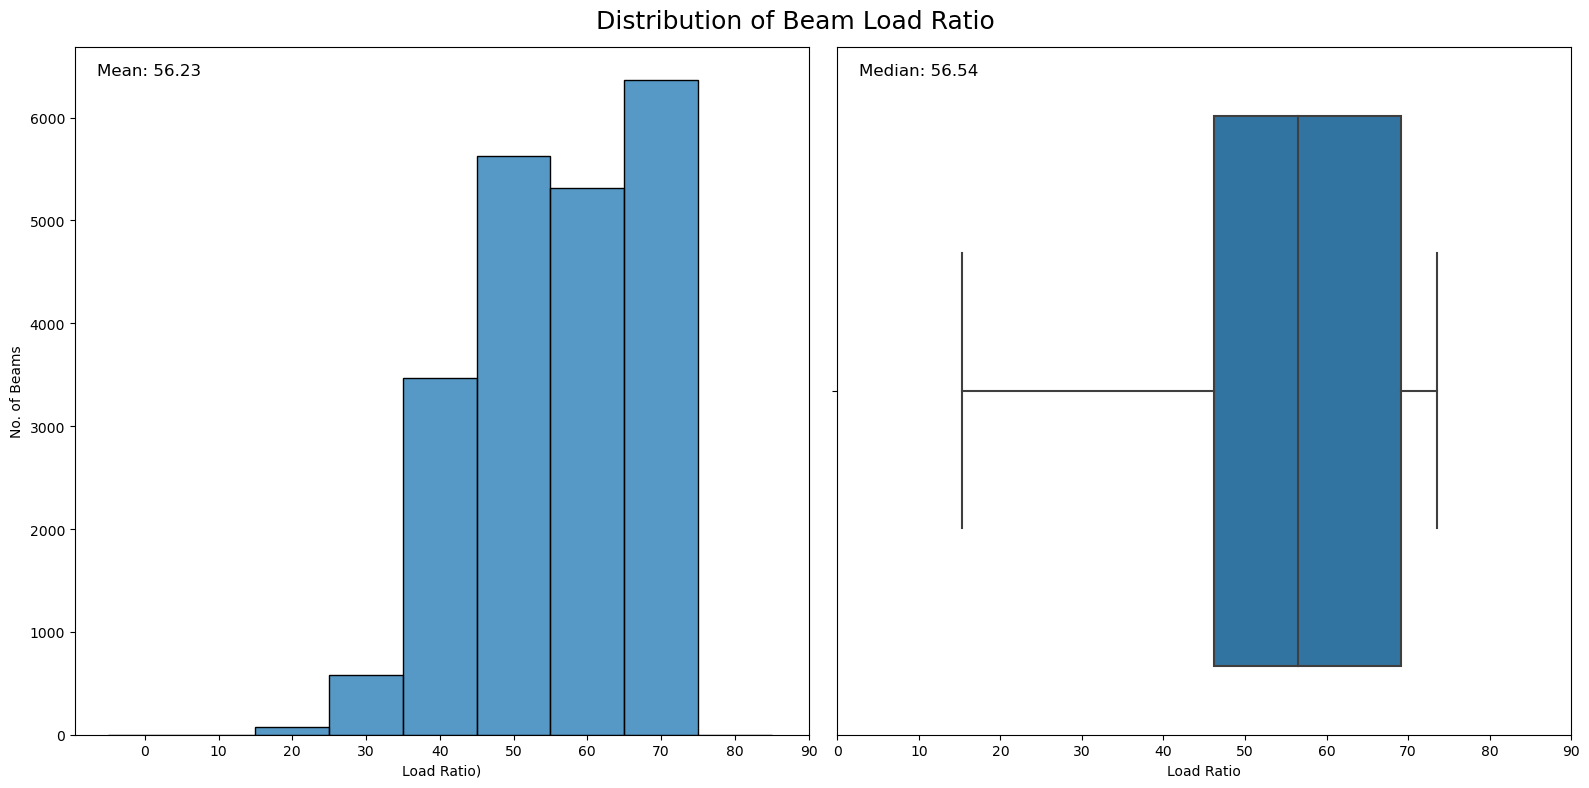

In [9]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='load_ratio',
    bins=np.arange(0,100,10)-5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='load_ratio',
)

fig.suptitle('Distribution of Beam Load Ratio', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Load Ratio)')
axs[1].set_xlabel('Load Ratio')

mean = df['load_ratio'].mean()
median = df['load_ratio'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,100,10))
axs[1].set_xticks(np.arange(0,100,10))

plt.tight_layout();

### 6.16 Fire Resistance <a id="fire_resistance"></a>

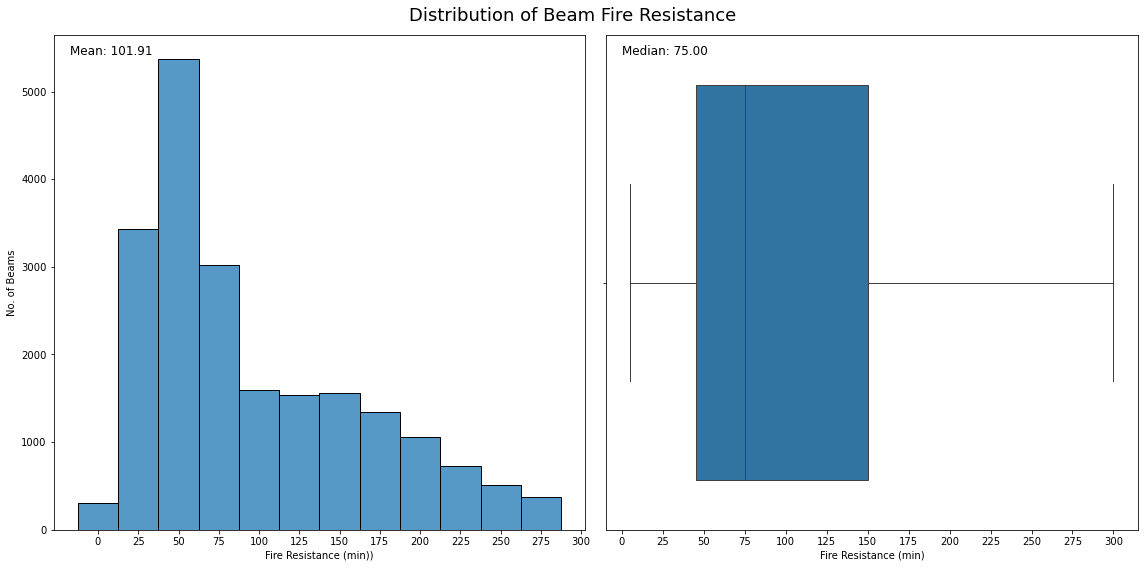

In [216]:
fig, axs = plt.subplots(nrows=1,
                        ncols=2,
                        figsize=(16,8))

sns.histplot(
    ax=axs[0],
    data=df,
    x='fire_resistance',
    bins=np.arange(0,320,25)-12.5
)

sns.boxplot(
    ax=axs[1],
    data=df,
    x='fire_resistance',
)

fig.suptitle('Distribution of Beam Fire Resistance', size=18)

axs[0].set_ylabel('No. of Beams')
axs[0].set_xlabel('Fire Resistance (min))')
axs[1].set_xlabel('Fire Resistance (min)')

mean = df['fire_resistance'].mean()
median = df['fire_resistance'].median()
axs[0].annotate(f'Mean: {mean:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)
axs[1].annotate(f'Median: {median:.2f}', xy=(0.03, 0.96), xycoords='axes fraction', fontsize=12)

axs[0].set_xticks(np.arange(0,320,25))
axs[1].set_xticks(np.arange(0,320,25))

plt.tight_layout();

* Fire resistance has low number of data points at the extreme values (5 mins and 300 mins).

## 7. Bivariate Analysis <a id="bivariate_analysis"></a>

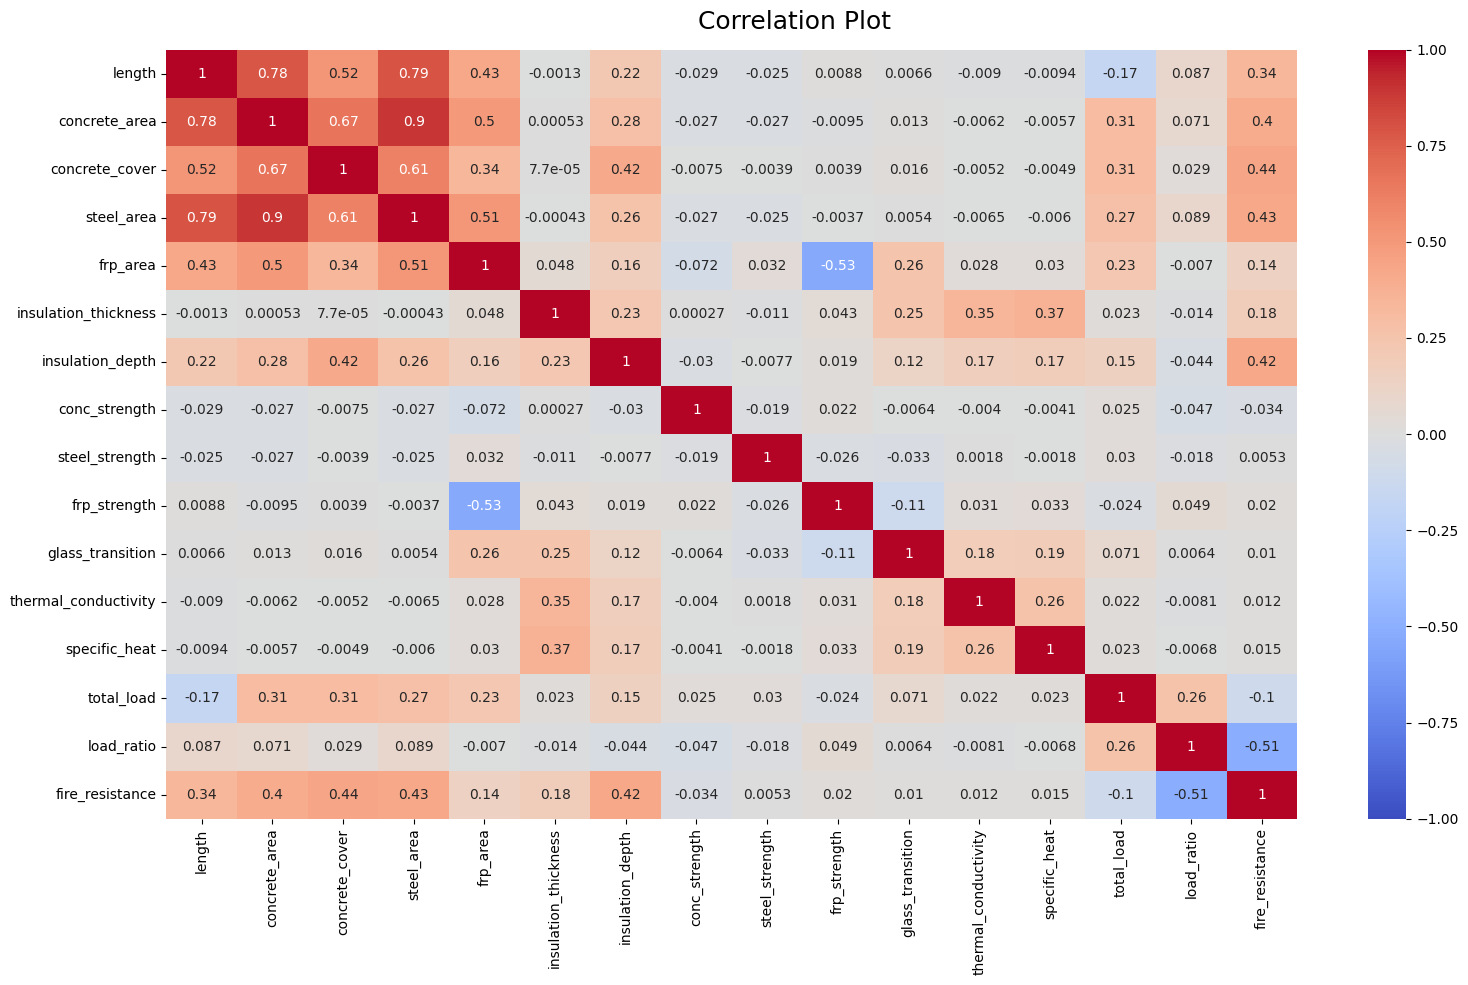

In [26]:
fig, ax = plt.subplots(figsize=(16,10))

sns.heatmap(df.iloc[:,1:].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

fig.suptitle('Correlation Plot', size=18)

plt.tight_layout()

### 7.1 Length of Beam vs Fire Resistance<a id="length_vs_fire"></a>

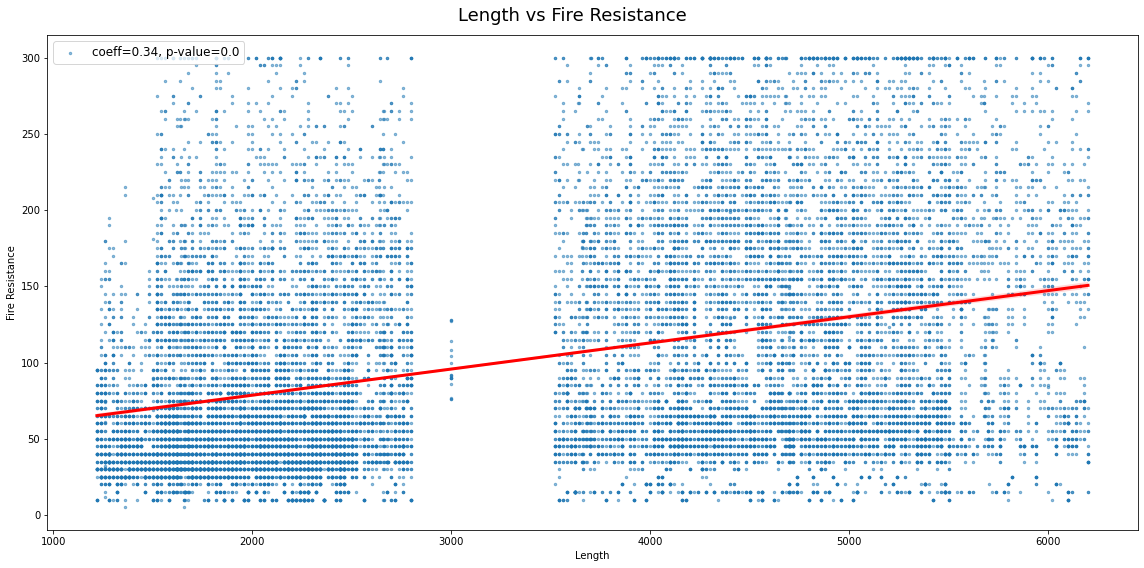

In [226]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['length'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='length',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Length vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Length')

plt.tight_layout();

### 7.2 Concrete Area  vs Fire Resistance <a id="conc_area_vs_fire"></a>

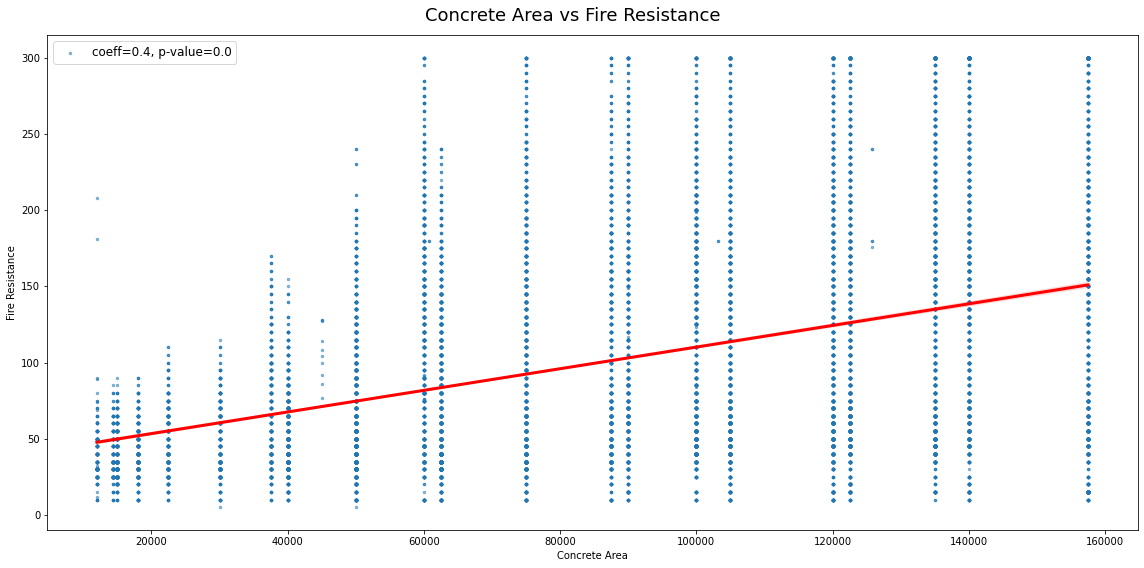

In [231]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['concrete_area'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='concrete_area',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Concrete Area vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Concrete Area')

plt.tight_layout();

### 7.3 Concrete Cover vs Fire Resistance <a id="conc_cover_vs_fire"></a>

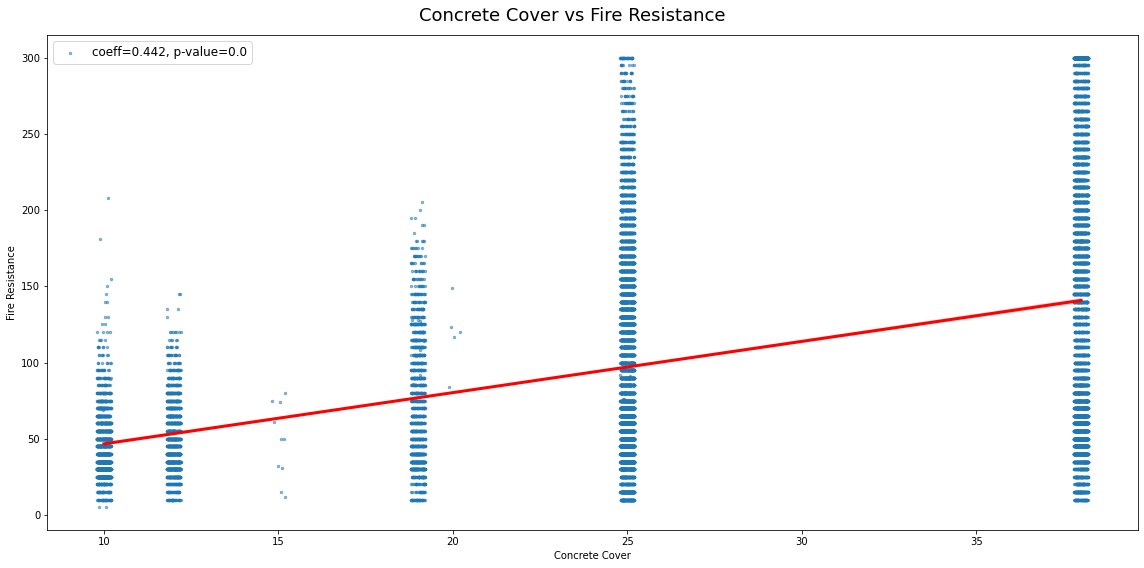

In [232]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['concrete_cover'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='concrete_cover',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Concrete Cover vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Concrete Cover')

plt.tight_layout();

### 7.4 Steel Area vs Fire Resistance<a id="steel_vs_fire"></a>

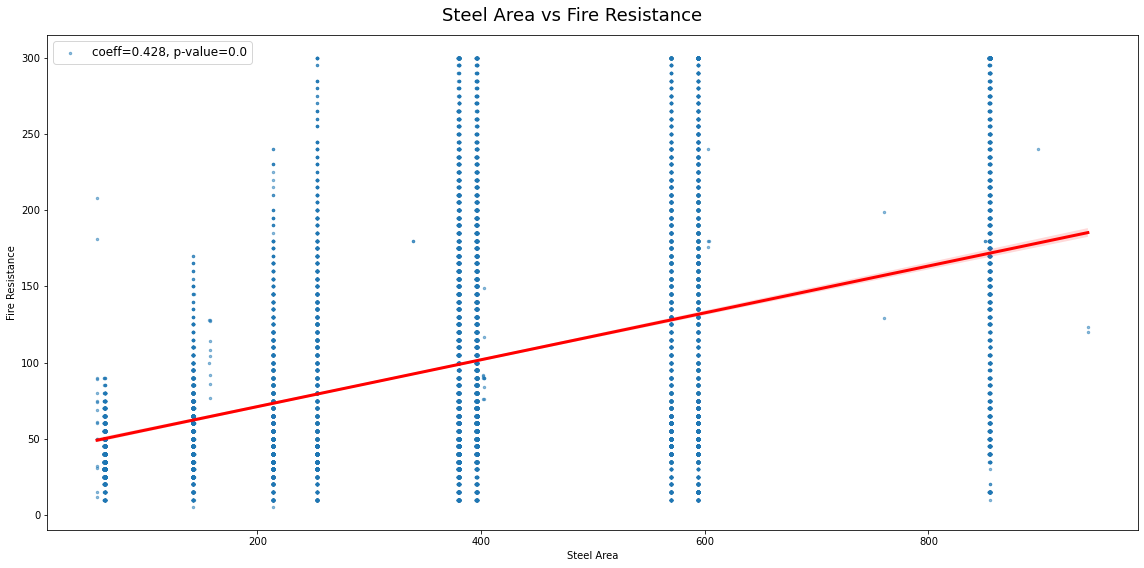

In [233]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['steel_area'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='steel_area',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Steel Area vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Steel Area')

plt.tight_layout();

### 7.5  FRP Area vs Fire Resistance <a id="frp_vs_fire"></a>

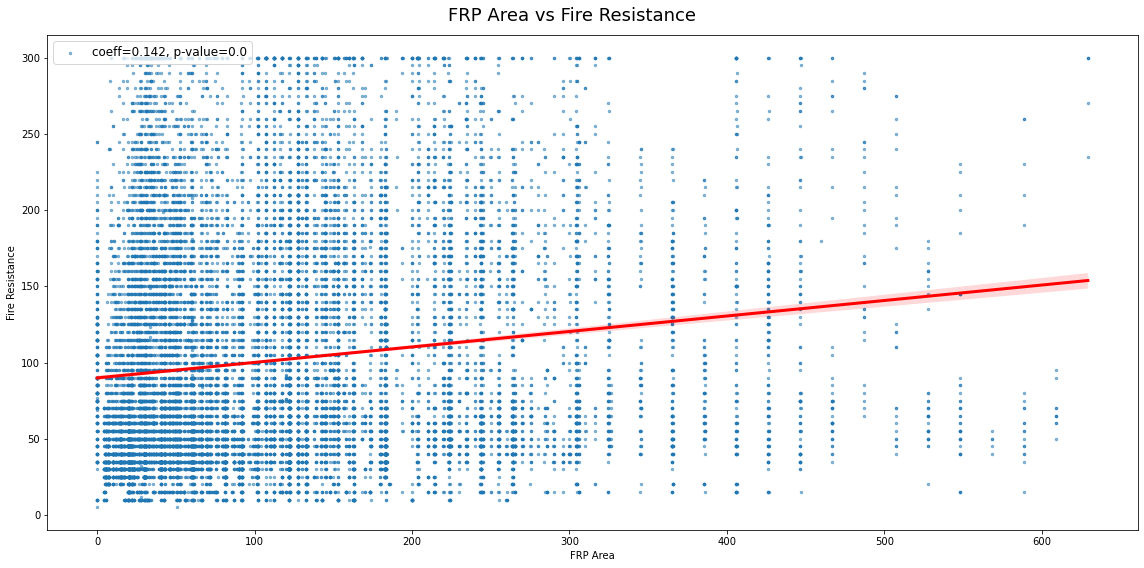

In [234]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['frp_area'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='frp_area',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('FRP Area vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('FRP Area')

plt.tight_layout();

### 7.6  Insulation Thickness vs Fire Resistance <a id="insulation_thickness_vs_fire"></a>

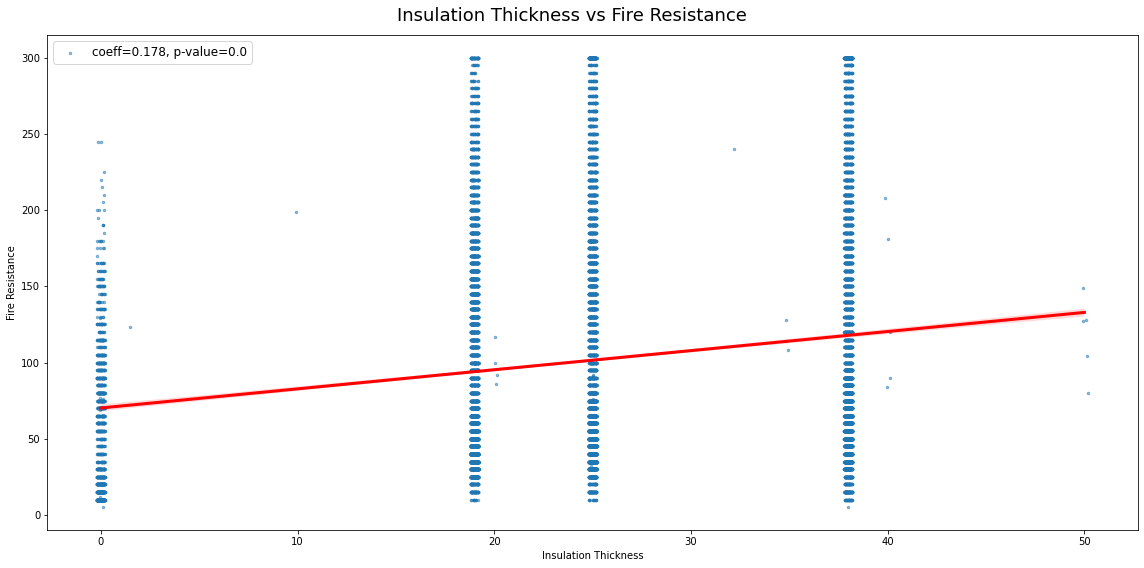

In [237]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['insulation_thickness'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='insulation_thickness',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Insulation Thickness vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Insulation Thickness')

plt.tight_layout();

### 7.7 Insulation Depth vs Fire Resistance <a id="insulation_depth_vs_fire"></a>

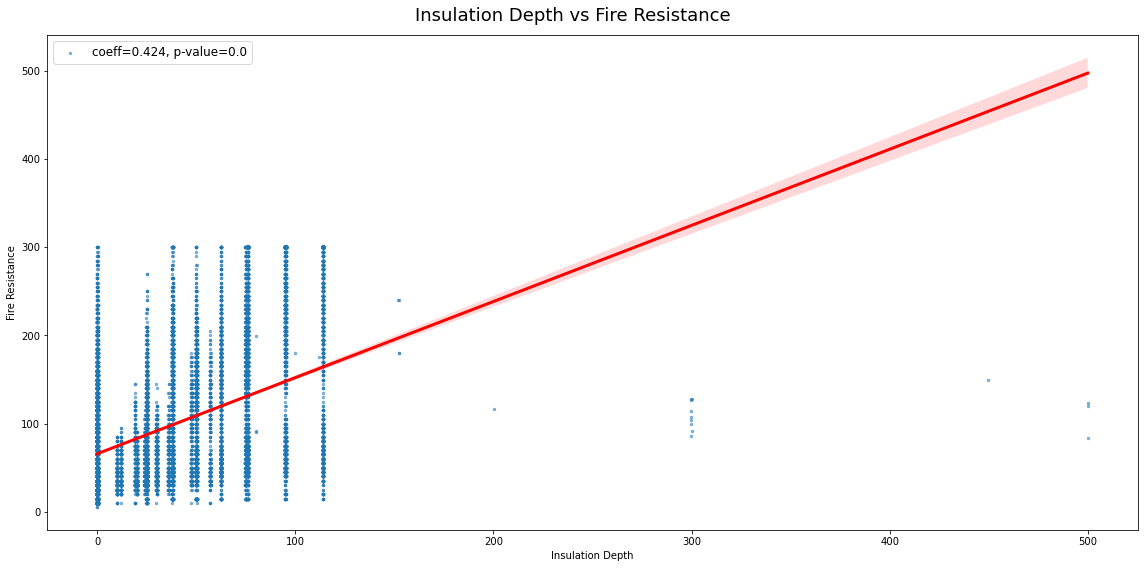

In [239]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['insulation_depth'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='insulation_depth',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Insulation Depth vs Fire Resistance', size=18)
ax.set_xlabel('Insulation Depth')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.8 Concrete Strength vs Fire Resistance <a id="conc_strength_vs_fire"></a>

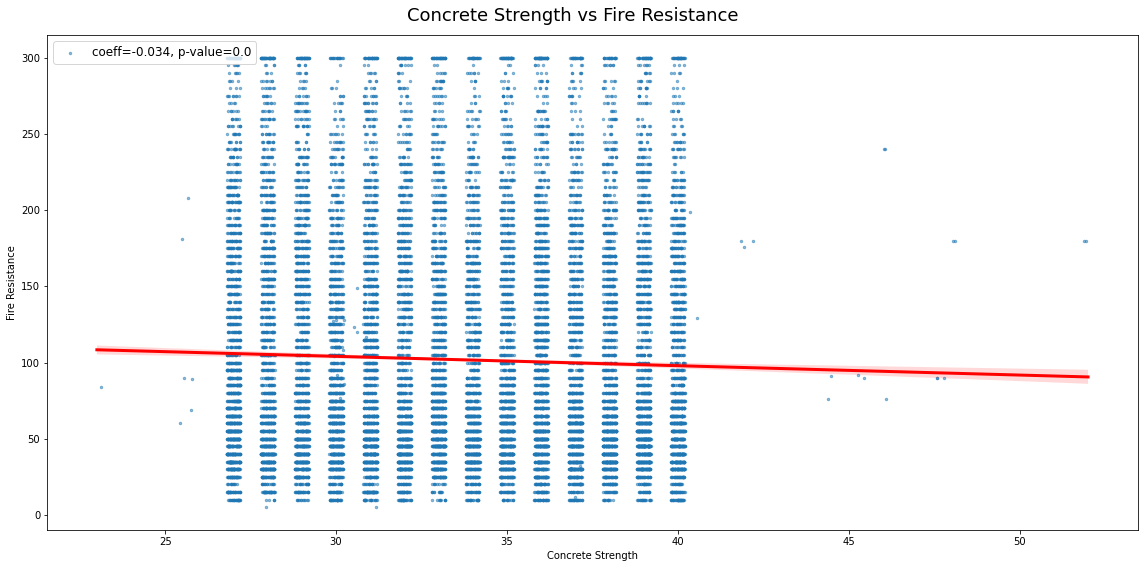

In [241]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['conc_strength'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='conc_strength',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Concrete Strength vs Fire Resistance', size=18)
ax.set_xlabel('Concrete Strength')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.9 Steel Strength vs Fire Resistance <a id="steel_strength_vs_fire"></a>

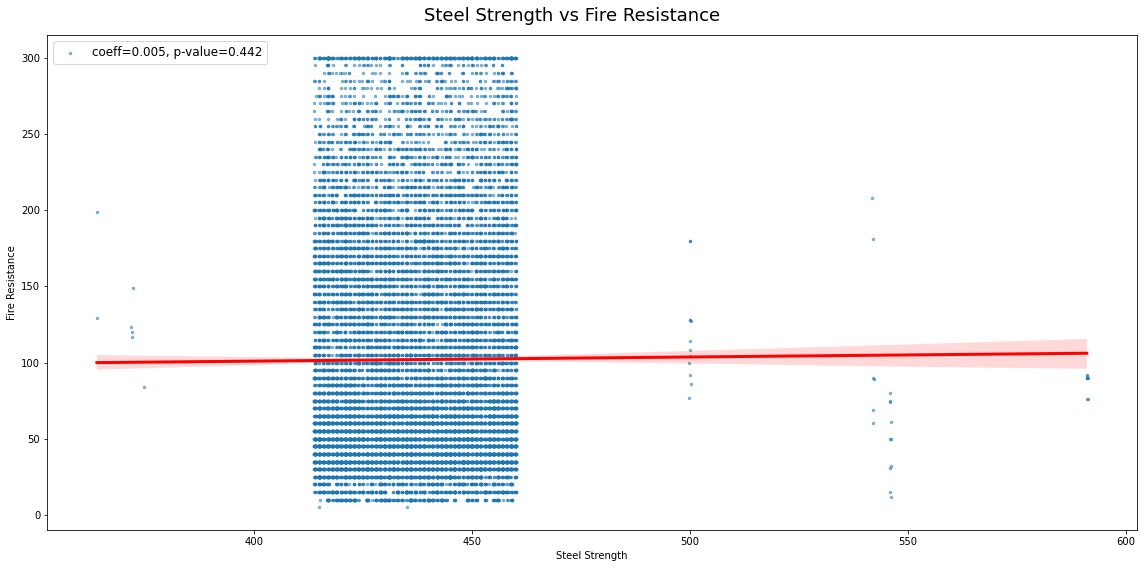

In [242]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['steel_strength'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='steel_strength',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Steel Strength vs Fire Resistance', size=18)
ax.set_xlabel('Steel Strength')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.10 FRP Strength vs Fire Resistance <a id="frp_strength_vs_fire"></a>

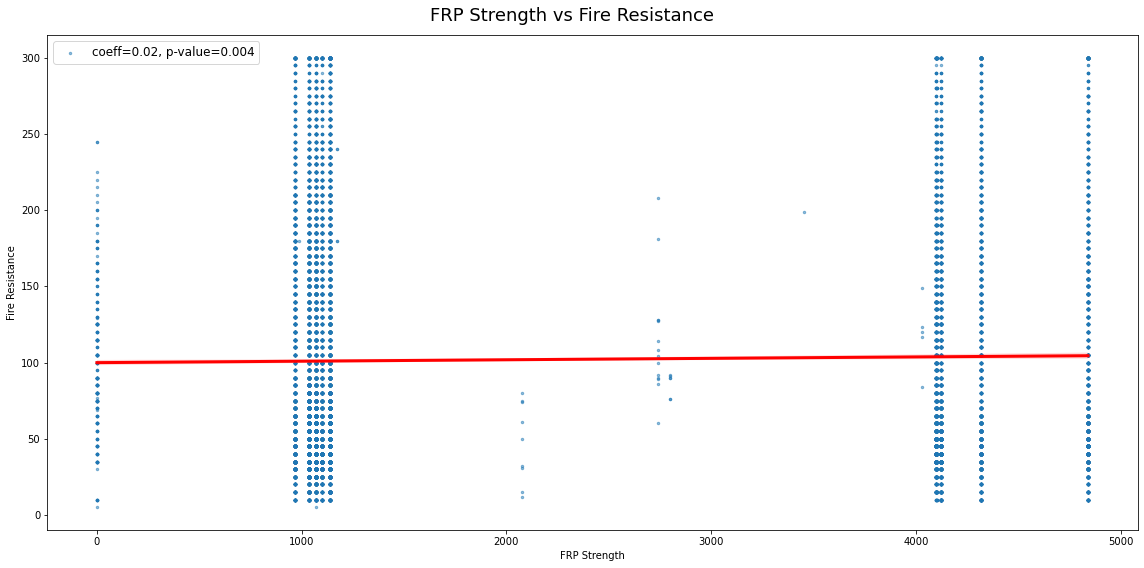

In [243]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['frp_strength'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='frp_strength',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('FRP Strength vs Fire Resistance', size=18)
ax.set_xlabel('FRP Strength')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.11 Glass Transition vs Fire Resistance <a id="glass_transition_vs_fire"></a>

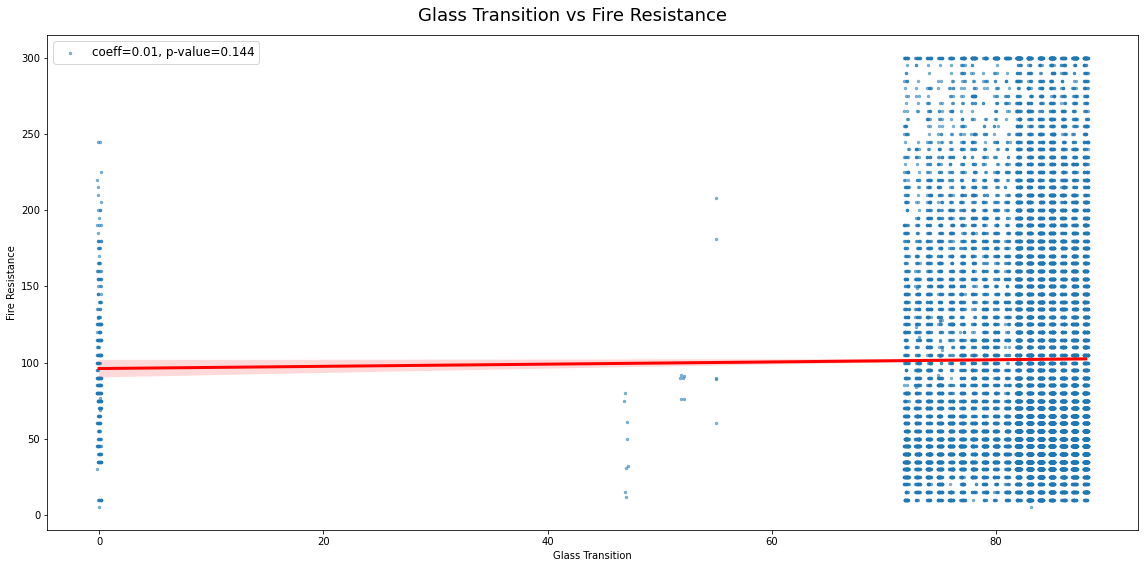

In [245]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['glass_transition'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='glass_transition',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Glass Transition vs Fire Resistance', size=18)
ax.set_xlabel('Glass Transition')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.12 Thermal Conductivity vs Fire Resistance <a id="thermal_conductivity_vs_fire"></a>

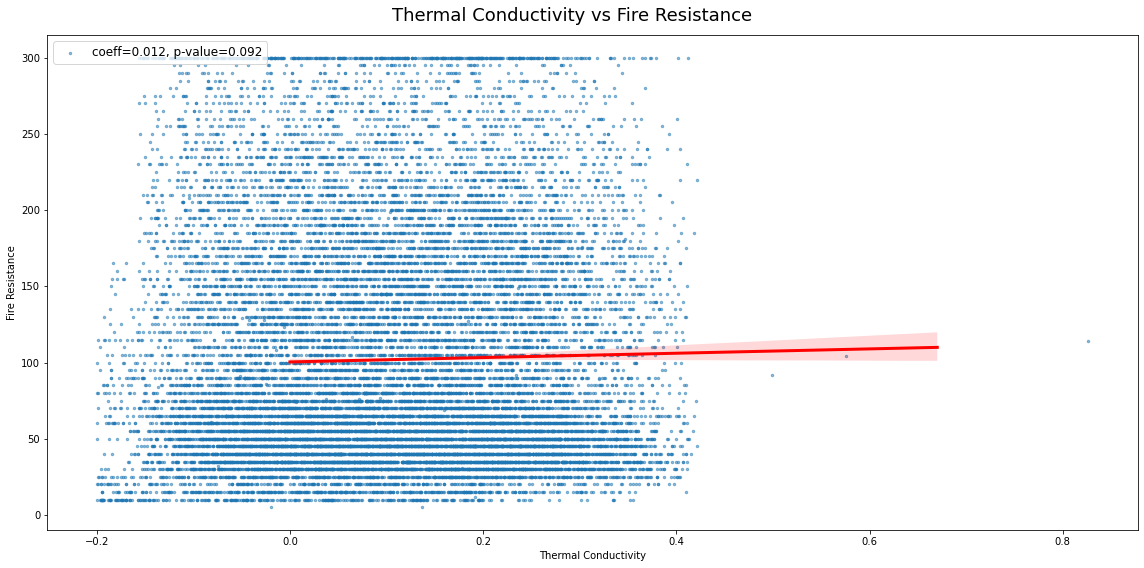

In [246]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['thermal_conductivity'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='thermal_conductivity',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Thermal Conductivity vs Fire Resistance', size=18)
ax.set_xlabel('Thermal Conductivity')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.13 Specific Heat vs Fire Resistance <a id="specific_heat_vs_fire"></a>

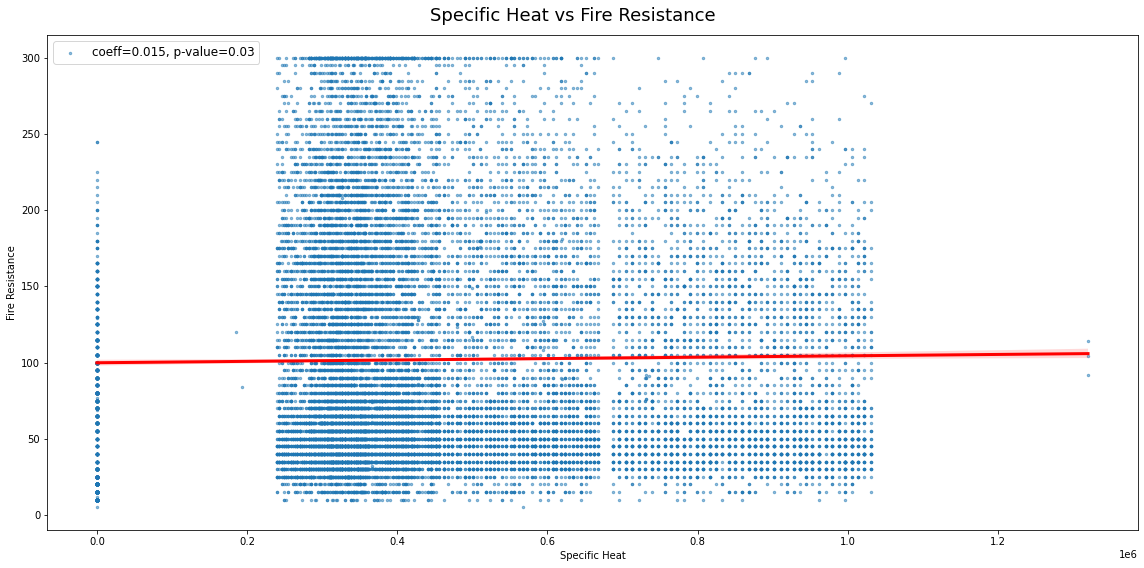

In [247]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['specific_heat'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='specific_heat',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Specific Heat vs Fire Resistance', size=18)
ax.set_xlabel('Specific Heat')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.14 Total Load vs Fire Resistance <a id="total_load_vs_fire"></a>

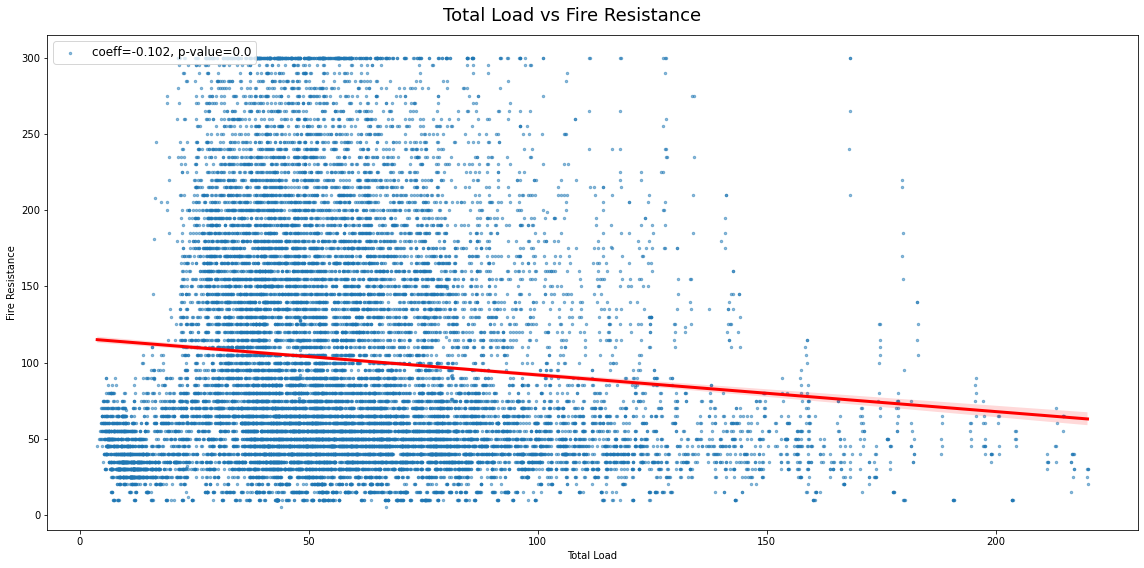

In [248]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['total_load'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='total_load',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Total Load vs Fire Resistance', size=18)
ax.set_xlabel('Total Load')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

### 7.15 Load Ratio vs Fire Resistance <a id="load_ratio_vs_fire"></a>

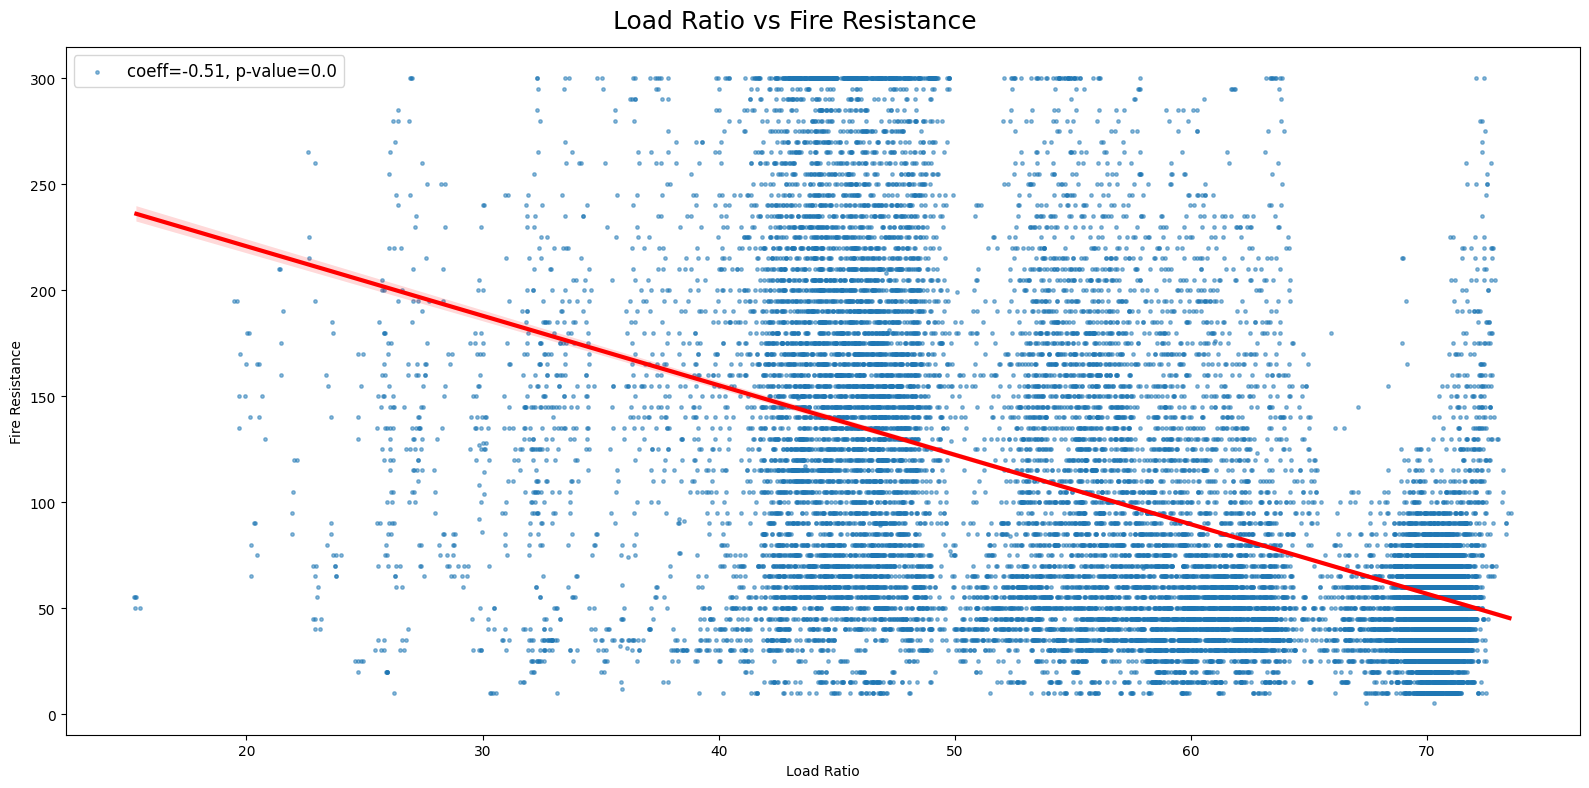

In [27]:
fig, ax = plt.subplots(figsize=(16,8))

coeff, p_value = stats.pearsonr(df['load_ratio'], df['fire_resistance'])

sns.regplot(
    data=df,
    x='load_ratio',
    y='fire_resistance',
    line_kws=dict(
        color='r',
        lw=3
    ),
    scatter_kws=dict(
        alpha=0.5,
        s=6,
        zorder=1
    ),
    x_jitter=0.2,
    label=f'coeff={round(coeff,3)}, p-value={round(p_value,3)}'
)

ax.legend(fontsize=12, loc='upper left').set_visible(True)

fig.suptitle('Load Ratio vs Fire Resistance', size=18)
ax.set_xlabel('Load Ratio')
ax.set_ylabel('Fire Resistance')

plt.tight_layout();

The features with the highest correlation with fire resistance are:
* load ratio (-0.51)
* concrete cover (0.44)
* steel area (0.43)
* insulation depth (0.42)
* concrete area (0.40)

## 8. Multivariate Analysis <a id="multivariate_analysis"></a>

### 8.1 Insulation Depth, Load Ratio vs Fire Resistance <a id="insulation_depth_vs_load_ratio_vs_fire"></a>

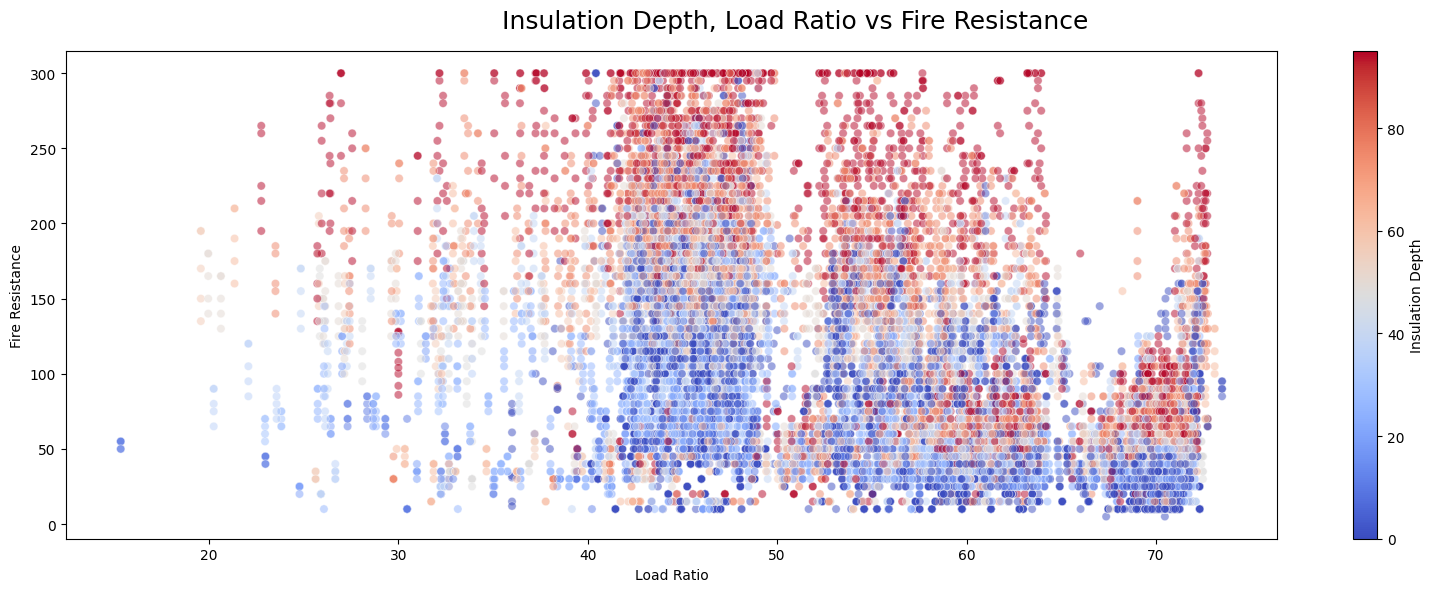

In [43]:
fig, ax= plt.subplots(figsize=(16,6))

sns.scatterplot(
    ax=ax,
    data=df, 
    x='load_ratio',
    y='fire_resistance',
    hue='insulation_depth',
    palette='coolwarm',
    alpha=0.5,
    hue_norm=(0, 
              df['insulation_depth'].quantile(0.90)),
    legend=False
)

#Add colorbar
norm = plt.Normalize(0, df['insulation_depth'].quantile(0.90))
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=ax, label='Insulation Depth')

fig.suptitle('Insulation Depth, Load Ratio vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Load Ratio')

plt.tight_layout();

* FRP-strengthened beams can have satisfactory fire resistance even at higher load ratios if sufficient insulation depth is provided.

### 8.2 Insulation Thickness, Load Ratio vs Fire Resistance <a id="insulation_thickness_vs_load_ratio_vs_fire"></a>

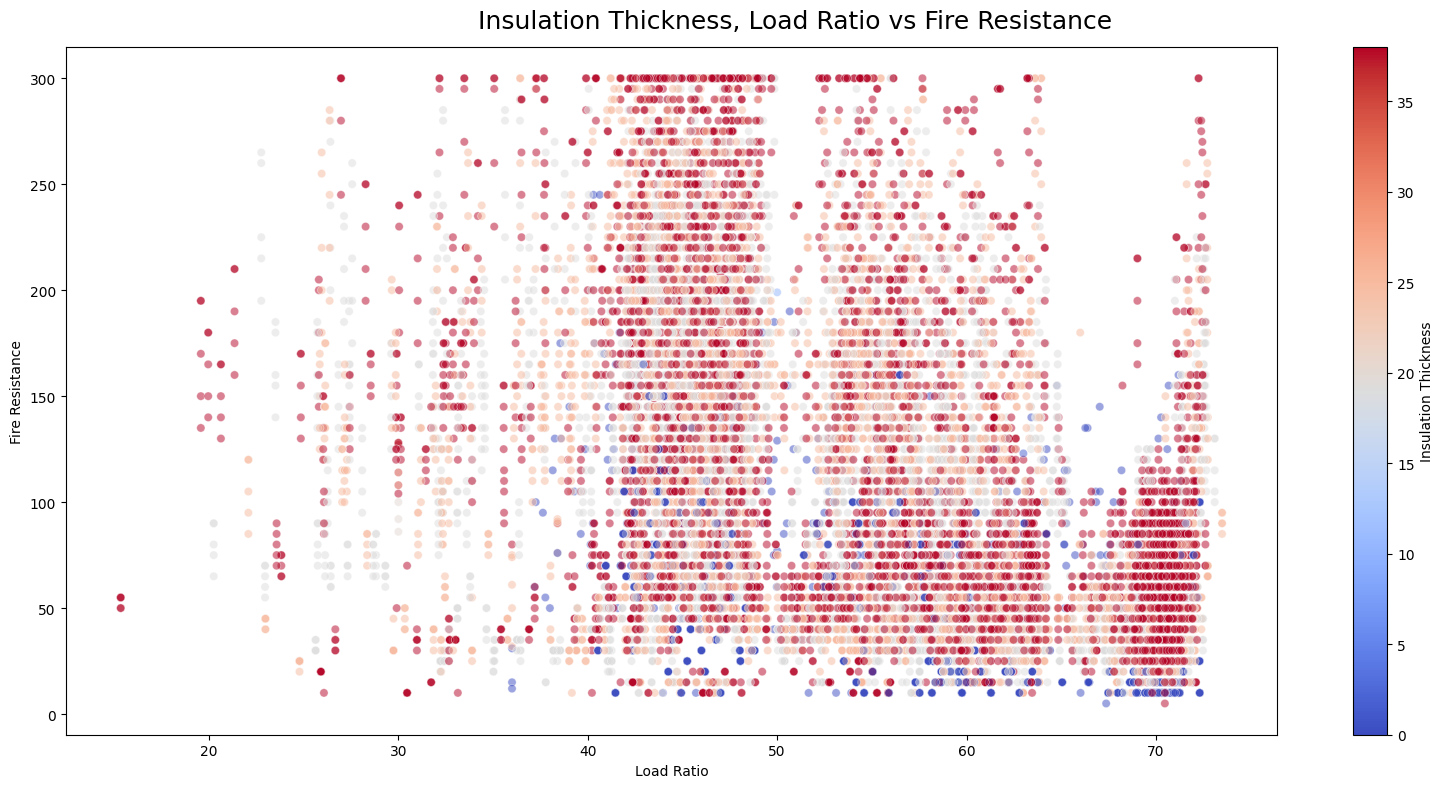

In [44]:
fig, ax= plt.subplots(figsize=(16,8))

sns.scatterplot(
    ax=ax,
    data=df, 
    x='load_ratio',
    y='fire_resistance',
    hue='insulation_thickness',
    palette='coolwarm',
    alpha=0.5,
    hue_norm=(0, 
              df['insulation_thickness'].quantile(0.90)),
    legend=False
)

#Add colorbar
norm = plt.Normalize(0, df['insulation_thickness'].quantile(0.90))
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=ax, label='Insulation Thickness')

fig.suptitle('Insulation Thickness, Load Ratio vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Load Ratio')

plt.tight_layout();

* Insulation thickness does not improve the fire resistance as much as insulation depth.

### 8.3 Steel Area, Load Ratio vs Fire Resistance <a id="steel_vs_load_ratio_vs_fire"></a>

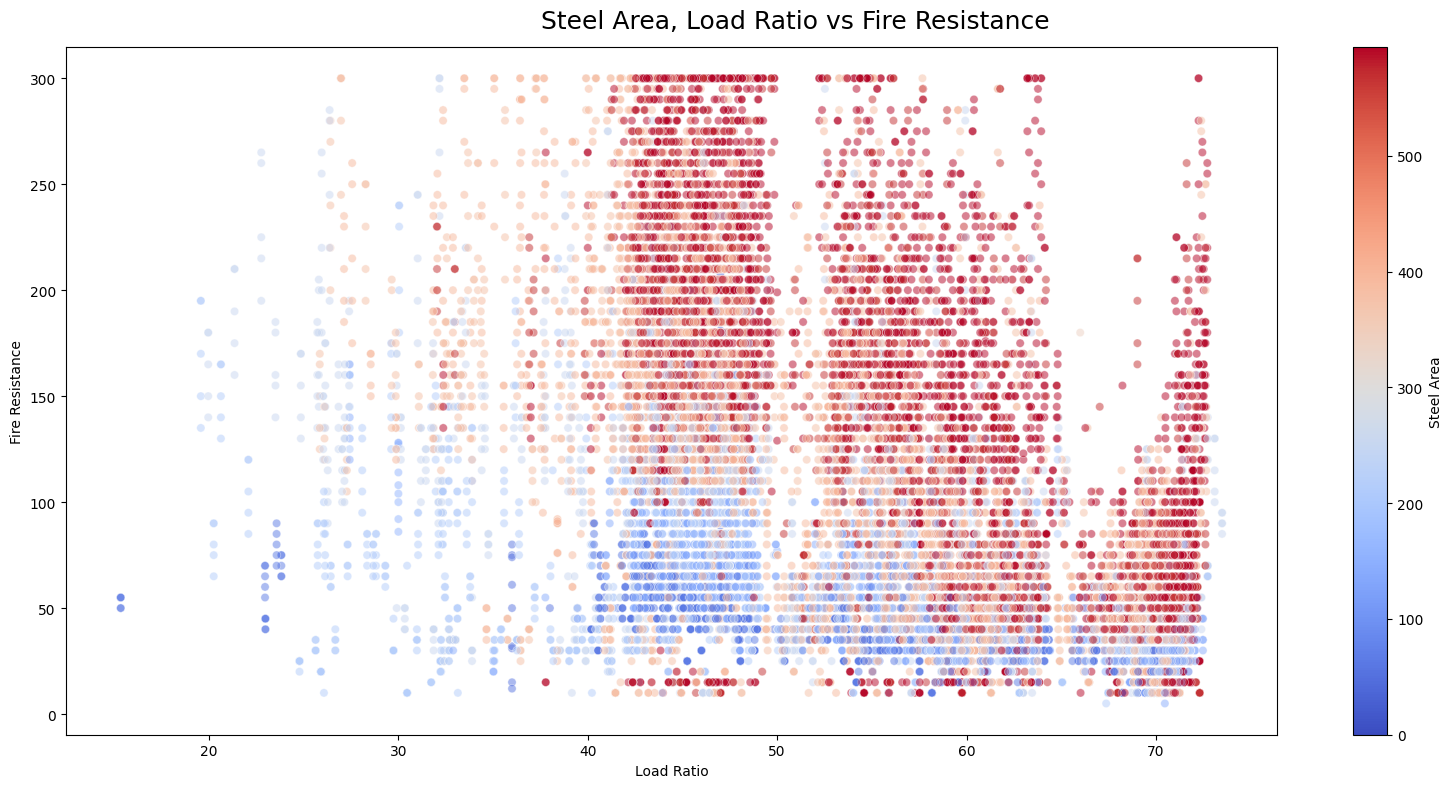

In [45]:
fig, ax= plt.subplots(figsize=(16,8))

sns.scatterplot(
    ax=ax,
    data=df, 
    x='load_ratio',
    y='fire_resistance',
    hue='steel_area',
    palette='coolwarm',
    alpha=0.5,
    hue_norm=(0, 
              df['steel_area'].quantile(0.90)),
    legend=False
)

#Add colorbar
norm = plt.Normalize(0, df['steel_area'].quantile(0.90))
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=ax, label='Steel Area')

fig.suptitle('Steel Area, Load Ratio vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Load Ratio')

plt.tight_layout();

* Higher values of steel area provides higher fire resistance but the improvement is not as pronounced as the insulation depth.

### 8.4 Concrete Cover, Load Ratio vs Fire Resistance <a id="conc_cover_vs_load_ratio_vs_fire"></a>

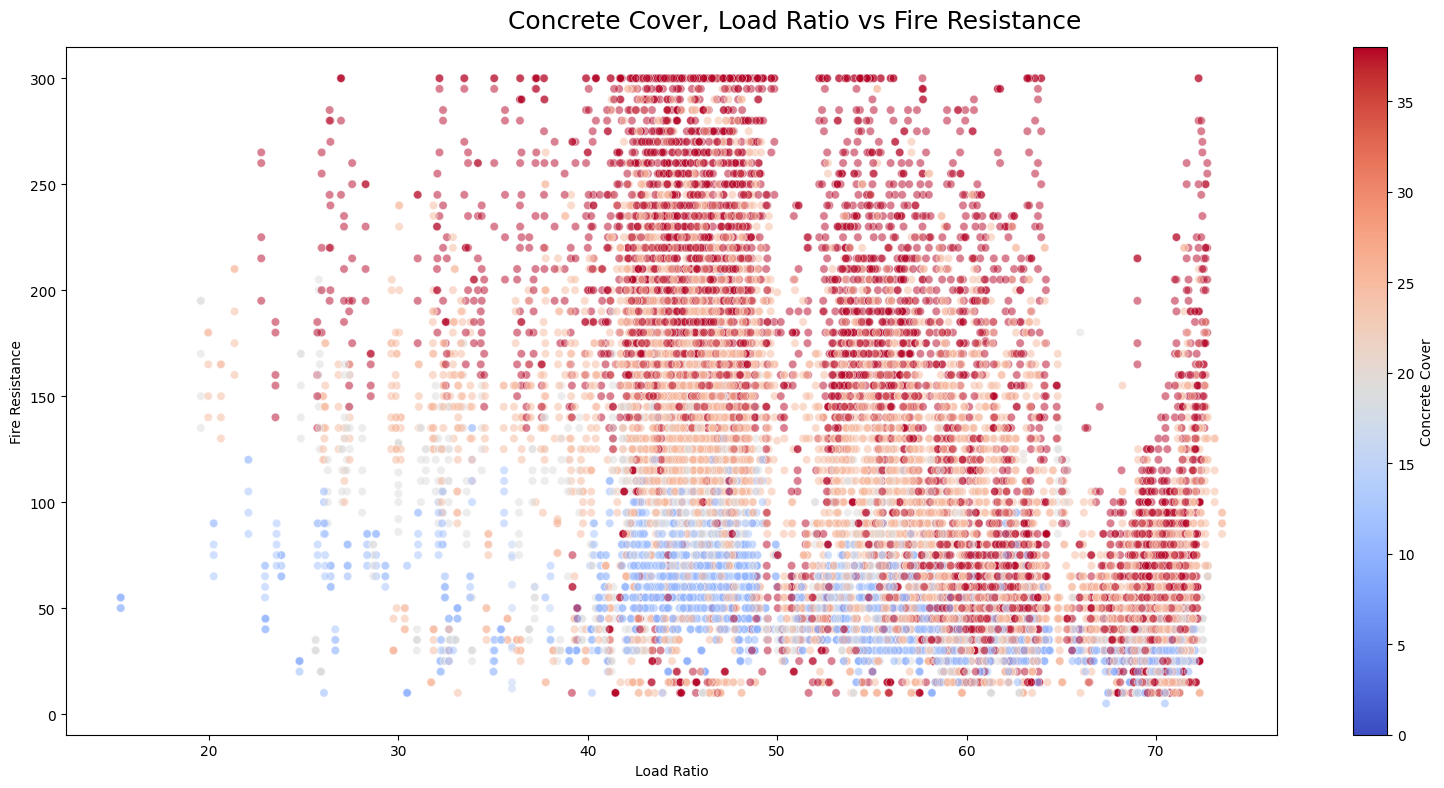

In [46]:
fig, ax= plt.subplots(figsize=(16,8))

sns.scatterplot(
    ax=ax,
    data=df, 
    x='load_ratio',
    y='fire_resistance',
    hue='concrete_cover',
    palette='coolwarm',
    alpha=0.5,
    hue_norm=(0, 
              df['concrete_cover'].quantile(0.90)),
    legend=False
)

#Add colorbar
norm = plt.Normalize(0, df['concrete_cover'].quantile(0.90))
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
ax.figure.colorbar(sm, ax=ax, label='Concrete Cover')

fig.suptitle('Concrete Cover, Load Ratio vs Fire Resistance', size=18)
ax.set_ylabel('Fire Resistance')
ax.set_xlabel('Load Ratio')

plt.tight_layout();

* Fire resistance is proportional to the provided concrete cover where higher values of concrete cover tend to have better fire resistivity.

## 9. Conclusion  <a id="conclusion"></a>

In the preceding exploratory data analysis, the following conclusions can be made:

* Fire resistance has mean value of 100 minutes and follows a normal distribution. There are sparse data points at the extremes of fire resistance, specifically at 5 minutes and 300 minutes, which may affect the prediction capabilities of machine learning models near this values. 
* Features such as load ratio, concrete cover, steel area, insulation depth, and concrete exhibit moderate correlation with fire resistance. The load ratio has a negative impact on fire resistance, while the other mentioned features display positive correlations.
* Despite higher load ratios, satisfactory fire resistance can still be achieved with increased insulation depth. Conversely, the influence of thicker insulation is not as significant as that of insulation depth.
* Enhanced fire resistivity is associated with greater concrete cover and steel area, although their effects are comparatively less pronounced than those of increased insulation depth.

----